# Presentation and Visualization Storytelling: Adults Dataset


To commence our examination of the "Adults" dataset, we will read the data from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data, hosted by the University of California, Irvine.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python",na_values='?')

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df=df.drop(['relationship','race','capital_gain','capital_loss','fnlwgt'],axis=1)

In [ ]:
df.head(5)

,age,workclass,education,education_num,marital_status,occupation,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K


In [ ]:
def simplify_marital_status(status):
  if 'Married' in status:
    return 'Married'
  elif 'Never-married' == status:
    return 'Never Married'
  elif 'Separated' == status:
    return 'Divorced'
  else:
    return status

In [ ]:
def simplify_education(edu, edu_num):
    if 'Preschool' in edu:
        return 'Preschool', 1
    elif '1st-4th' in edu or '5th-6th' in edu:
        return 'Elementary School', 2
    elif '7th-8th' in edu:
        return 'Middle School', 3
    elif '9th' in edu or '10th' in edu:
        return 'High School Dropout', 4
    elif '12th' in edu or 'HS-grad' in edu or '11th' in edu:
        return 'High School Graduate', 5
    elif 'Assoc-acdm' in edu or 'Assoc-voc' in edu or 'Some-college' in edu:
        return 'Some College', 6
    elif 'Bachelors' in edu:
        return 'Bachelors', 7
    elif 'Masters' in edu:
        return 'Masters', 8
    elif 'Doctorate' in edu or 'Prof-school' in edu:
        return 'Doctorate', 9
    else:
        return edu, edu_num

In [ ]:
df['marital_status'] = df['marital_status'].apply(simplify_marital_status)
df['education'], df['education_num'] = zip(*df.apply(lambda row: simplify_education(row['education'], row['education_num']), axis=1))

In [ ]:
unique_educations_ordered = df[['education', 'education_num']].drop_duplicates().sort_values('education_num')
print(unique_educations_ordered['education'].values)

['Preschool' 'Elementary School' 'Middle School' 'High School Dropout'
 'High School Graduate' 'Some College' 'Bachelors' 'Masters' 'Doctorate']


In [ ]:
iso_mapping = {
    'United-States': 'USA',
    'Cuba': 'CUB',
    'Jamaica': 'JAM',
    'India': 'IND',
    'Mexico': 'MEX',
    'South': 'KOR',
    'Puerto-Rico': 'PRI',
    'Honduras': 'HND',
    'England': 'GBR',
    'Canada': 'CAN',
    'Germany': 'DEU',
    'Iran': 'IRN',
    'Philippines': 'PHL',
    'Italy': 'ITA',
    'Poland': 'POL',
    'Columbia': 'COL',
    'Cambodia': 'KHM',
    'Thailand': 'THA',
    'Ecuador': 'ECU',
    'Laos': 'LAO',
    'Taiwan': 'TWN',
    'Haiti': 'HTI',
    'Portugal': 'PRT',
    'Dominican-Republic': 'DOM',
    'El-Salvador': 'SLV',
    'France': 'FRA',
    'Guatemala': 'GTM',
    'China': 'CHN',
    'Japan': 'JPN',
    'Yugoslavia': 'SRB',  # Replace 'Yugoslavia' with 'SRB' or the appropriate ISO code for Serbia
    'Peru': 'PER',
    'Outlying-US(Guam-USVI-etc)': 'USA',
    'Scotland': 'GBR',
    'Trinadad&Tobago': 'TTO',
    'Greece': 'GRC',
    'Nicaragua': 'NIC',
    'Vietnam': 'VNM',
    'Hong': 'HKG',
    'Ireland': 'IRL',
    'Hungary': 'HUN',
    'Holand-Netherlands': 'NLD'
}


In [ ]:
df['native_country'] = df['native_country'].map(iso_mapping)

In [ ]:
df['native_country'].unique()

array(['USA', 'CUB', 'JAM', 'IND', nan, 'MEX', 'KOR', 'PRI', 'HND', 'GBR',
       'CAN', 'DEU', 'IRN', 'PHL', 'ITA', 'POL', 'COL', 'KHM', 'THA',
       'ECU', 'LAO', 'TWN', 'HTI', 'PRT', 'DOM', 'SLV', 'FRA', 'GTM',
       'CHN', 'JPN', 'SRB', 'PER', 'TTO', 'GRC', 'NIC', 'VNM', 'HKG',
       'IRL', 'HUN', 'NLD'], dtype=object)

# Plots

## Education Distribution by Gender

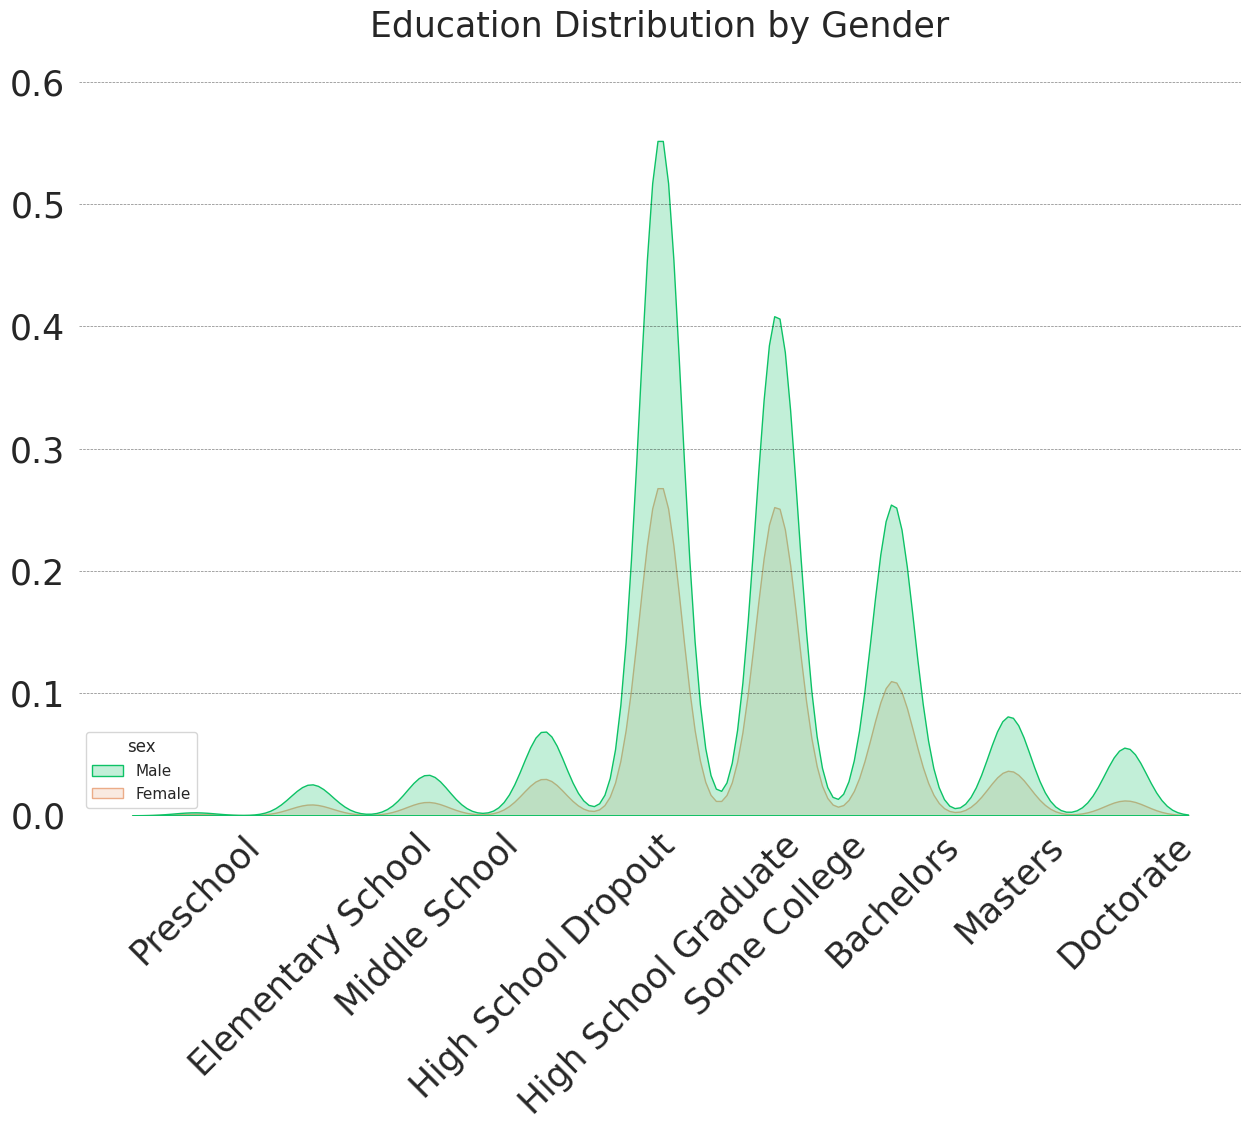

In [ ]:
# Set the style for the plots
sns.set(style="white")

# Custom colors
female_color = '#EBAC88'
male_color = '#0DC266'

# Create a KDE plot
plt.figure(figsize=(15, 10))
bp = sns.kdeplot(x='education_num', hue='sex', data=df, fill=True, common_norm=True, legend=True, palette={'Male': male_color, 'Female': female_color})

# Calculate and plot the mean
#mean_hours_per_week = df.groupby('sex')['education_num'].mean()
#plt.axvline(x=mean_hours_per_week['Male'], color=male_color, linestyle='--', label=f'Mean (Male): {math.floor(mean_hours_per_week["Male"])}')
#plt.axvline(x=mean_hours_per_week['Female'], color=female_color, linestyle='--', label=f'Mean (Female): {math.floor(mean_hours_per_week["Female"])}')

# Customize the plot
plt.title('Education Distribution by Gender', fontsize=25)
#plt.xlabel('Education Number')

xlabels = ['','Preschool','Elementary School','Middle School','High School Dropout','High School Graduate','Some College','Bachelors','Masters','Doctorate']
plt.xticks(range(len(xlabels)), xlabels, rotation=45, fontsize=25)
plt.yticks(fontsize=25 )
#plt.ylabel('Density')

bp.set(xlabel=None, ylabel=None)
plt.box(False)

for edu_num in [0.1,0.2,0.3,0.4,0.5,0.6]:
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

# Save the plot as a PNG image with a transparent background
plt.savefig('education_distribution_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

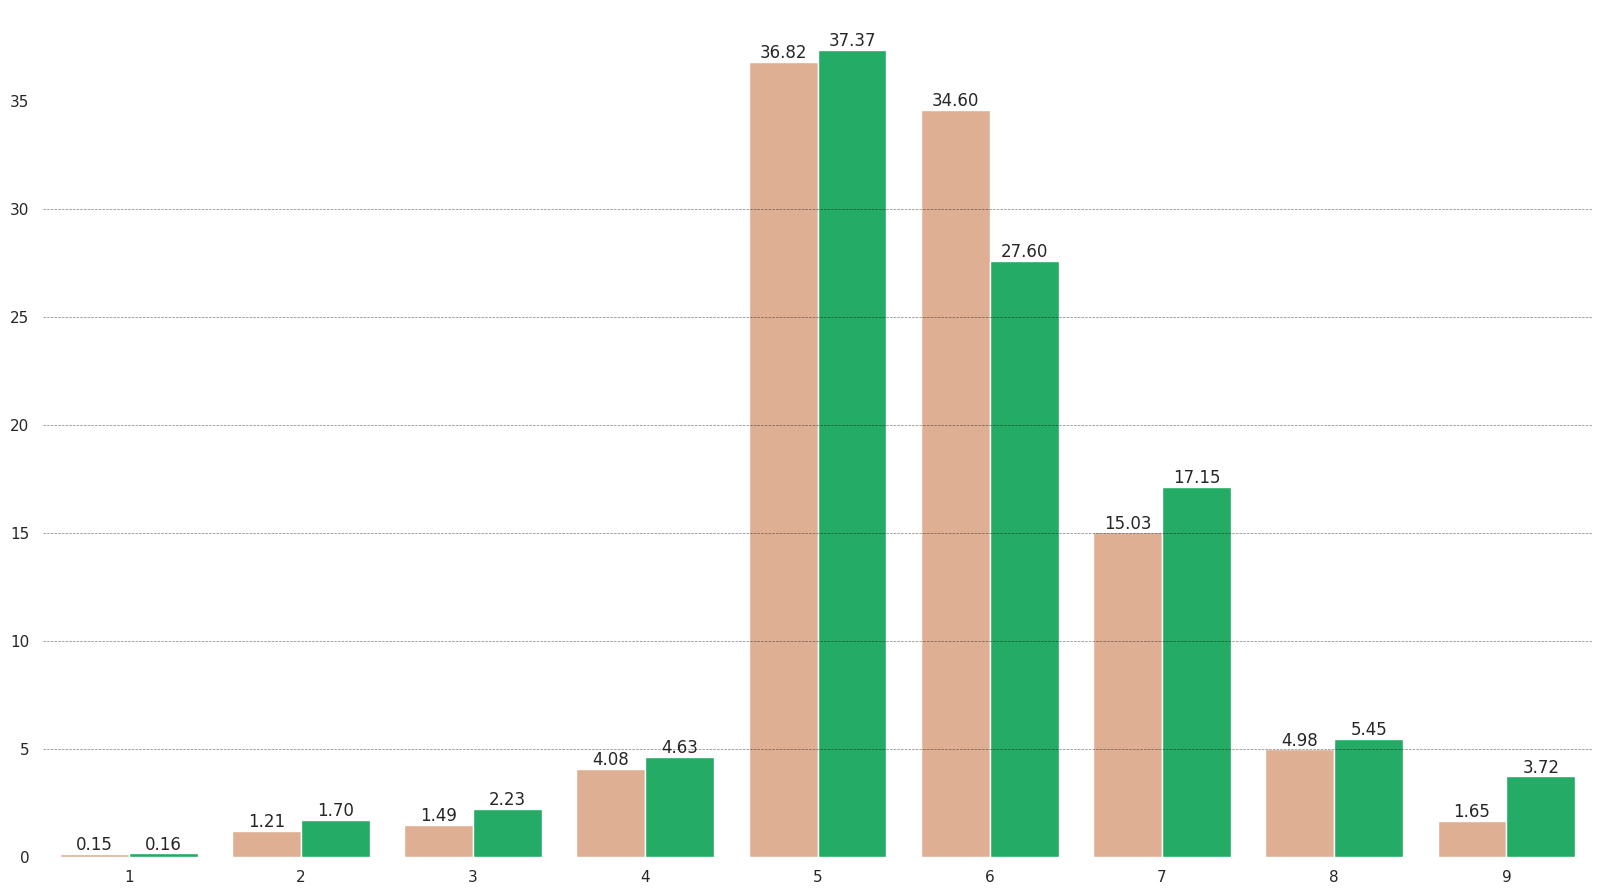

In [ ]:
import matplotlib.patches as patches

# Calculate the percentage of males and females for each education number
percentage_df = (
    df.groupby(['education_num', 'sex']).size() / df.groupby('sex').size()
).unstack() * 100

# Reset index for plotting
percentage_df = percentage_df.reset_index()

# Melt the DataFrame for Seaborn
melted_df = pd.melt(percentage_df, id_vars='education_num', var_name='sex', value_name='percentage')

# Create a bar plot using Seaborn
sns.set(style="white")
plt.figure(figsize=(20, 11))
ax = plt.gca()

# Use the `hue` parameter to differentiate between male and female
bp = sns.barplot(x='education_num', y='percentage', hue='sex', data=melted_df, palette={'Male': male_color, 'Female': female_color})

bp.bar_label(ax.containers[0], fmt='{:.2f}')
bp.bar_label(ax.containers[1], fmt='{:.2f}')

#for i, (category, value) in enumerate(zip(melted_df['education_num'], melted_df['percentage'])):
#    rect = patches.FancyBboxPatch((i - 0.1, 0), 0.005, value, facecolor='skyblue')
#    ax.add_patch(rect)

# Set labels and title
#plt.xlabel('Education Number')
#plt.ylabel('Percentage')
#plt.title('Percentage of Male and Female for Each Education Number')

bp.set(xlabel=None, ylabel=None)
plt.box(False)
plt.legend().set_visible(False)
for edu_num in range(5,35,5):
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

plt.savefig('education_barplot_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


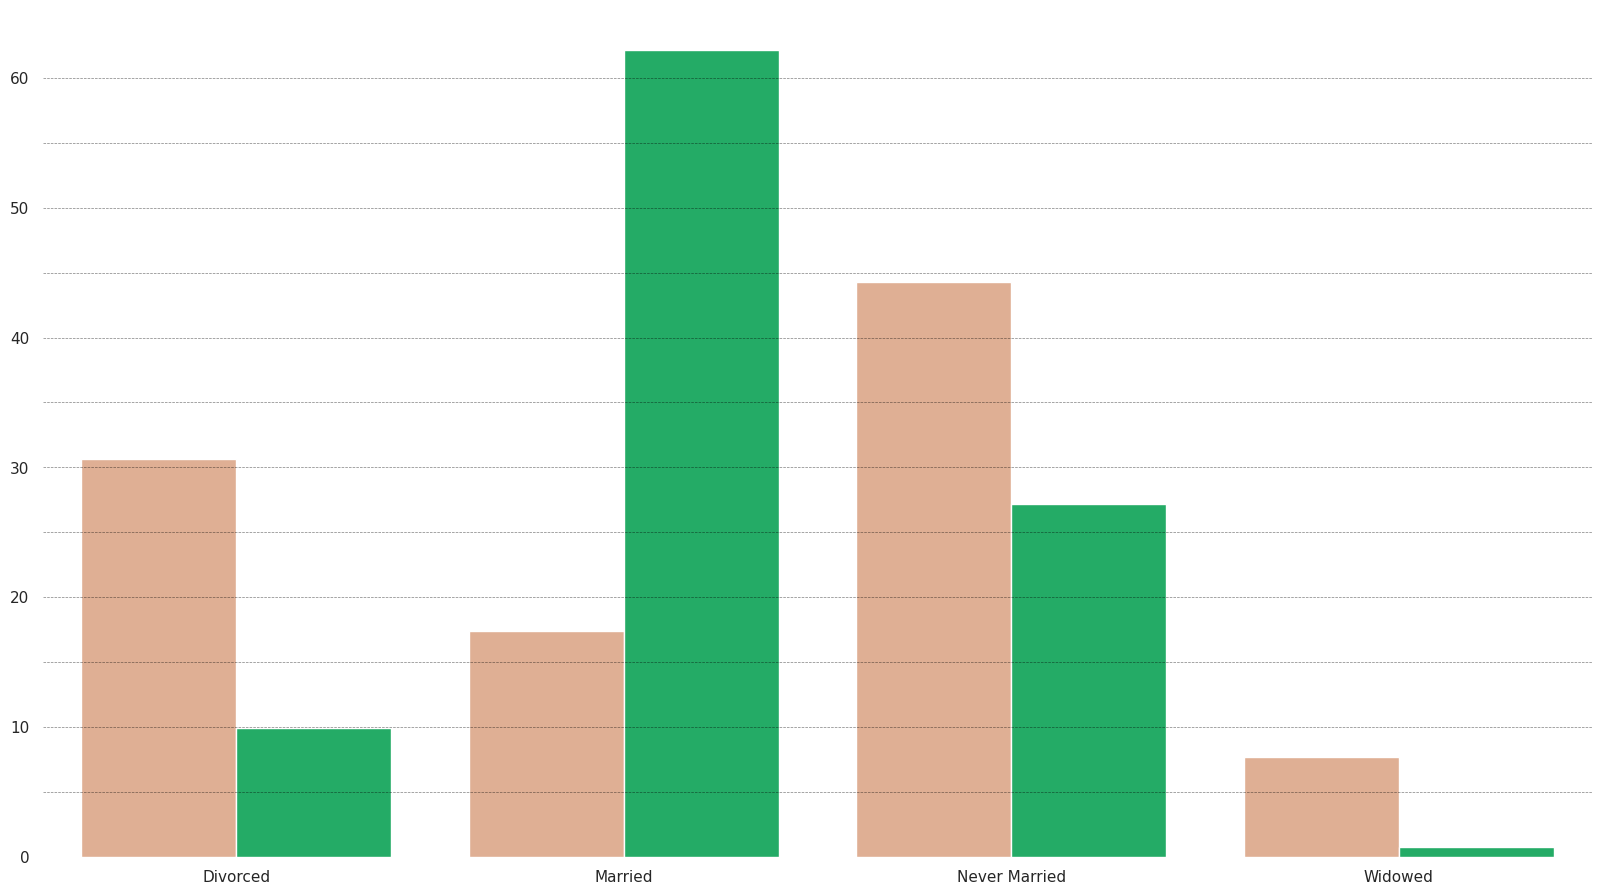

In [ ]:
import matplotlib.patches as patches

# Calculate the percentage of males and females for each education number
percentage_df = (
    df.groupby(['marital_status', 'sex']).size() / df.groupby('sex').size()
).unstack() * 100

# Reset index for plotting
percentage_df = percentage_df.reset_index()

# Melt the DataFrame for Seaborn
melted_df = pd.melt(percentage_df, id_vars='marital_status', var_name='sex', value_name='percentage')

# Create a bar plot using Seaborn
sns.set(style="white")
plt.figure(figsize=(20, 11))
ax = plt.gca()

# Use the `hue` parameter to differentiate between male and female
bp = sns.barplot(x='marital_status', y='percentage', hue='sex', data=melted_df, palette={'Male': male_color, 'Female': female_color})

bp.set(xlabel=None, ylabel=None)
plt.box(False)
plt.legend().set_visible(False)
for edu_num in range(5,65,5):
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

plt.savefig('marital_status_barplot_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

<ipython-input-65-975fe26c2ab6>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


0.25
0.89


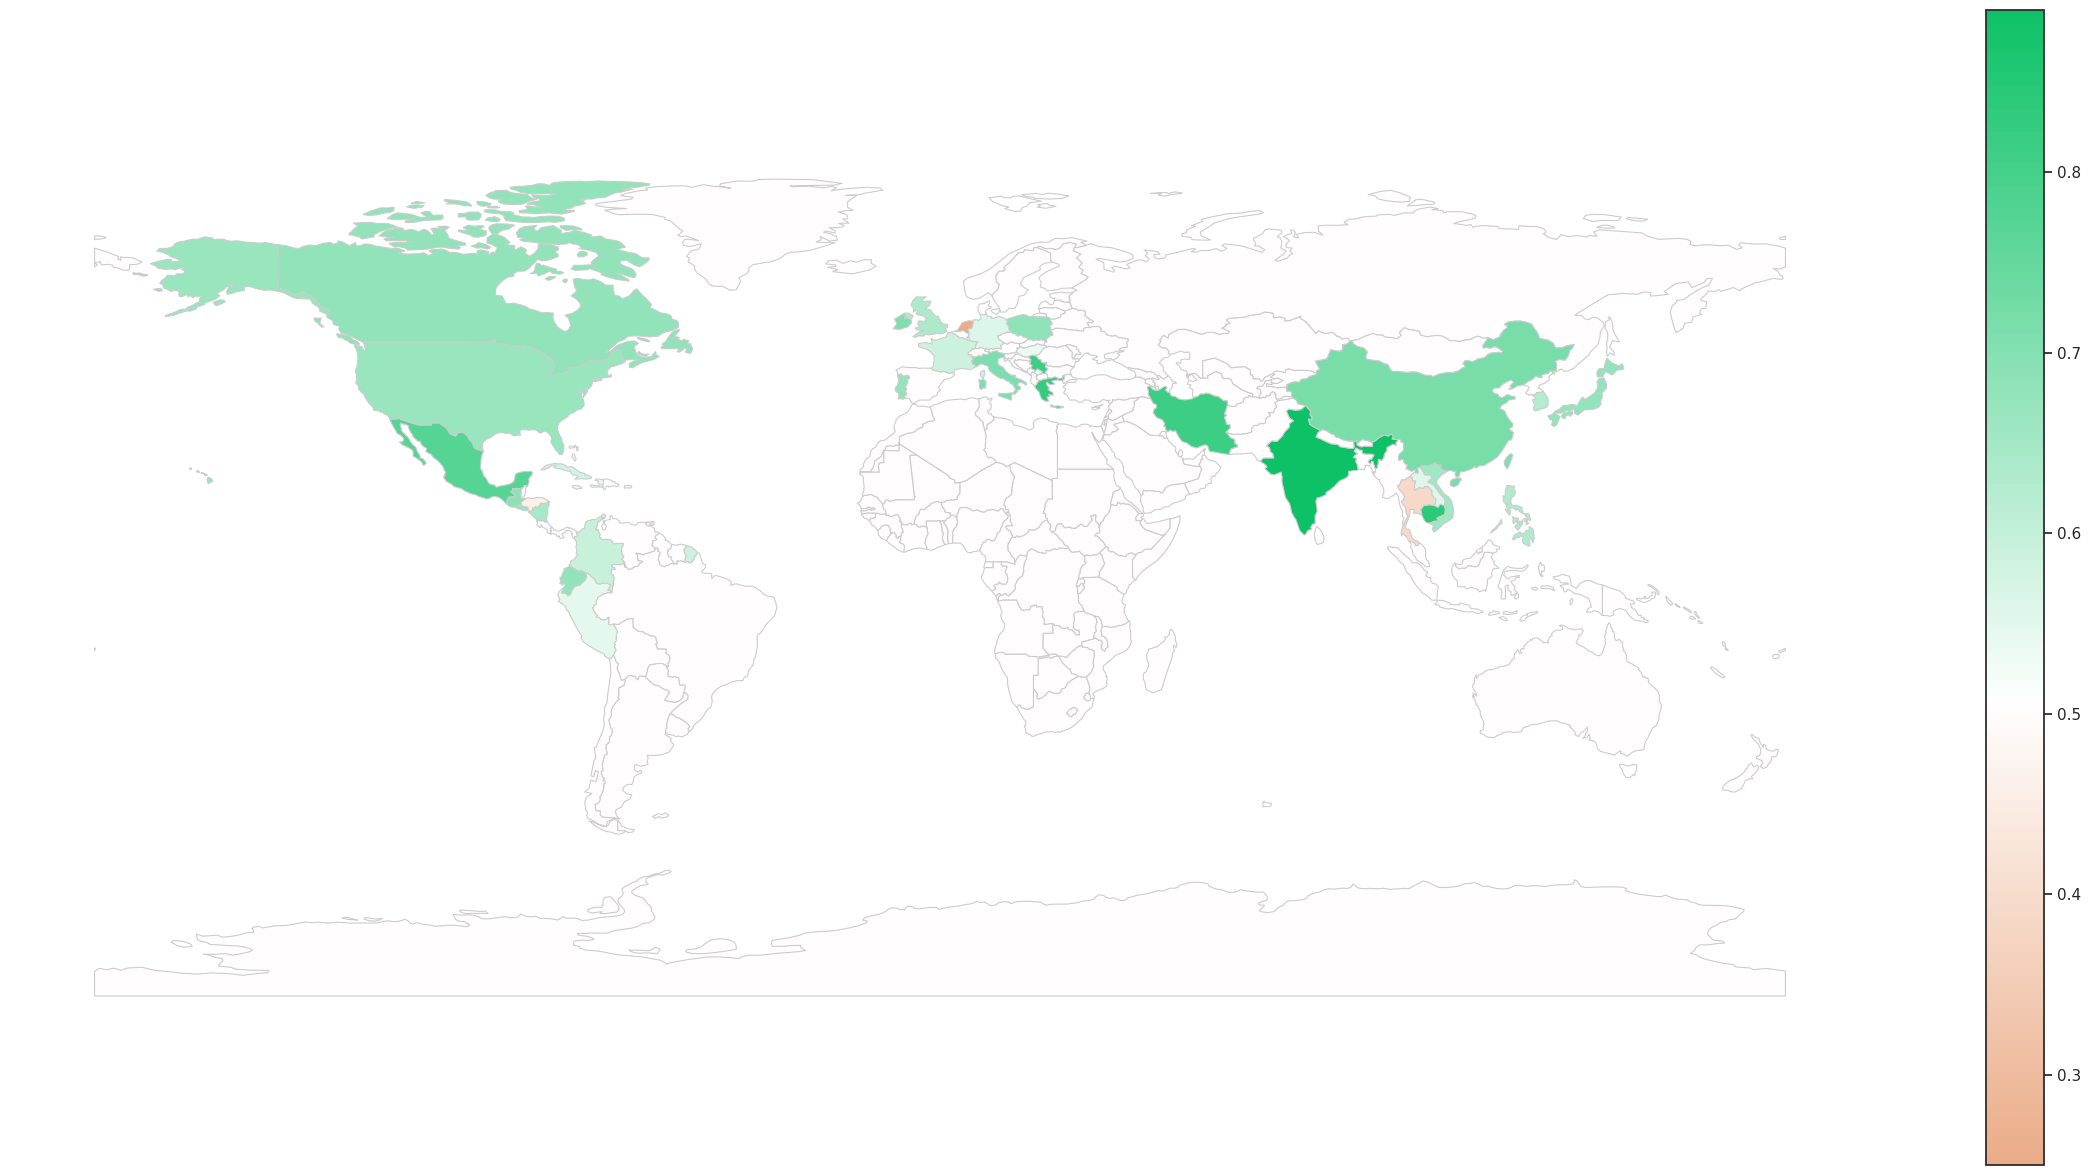

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Hypothetical addition of a 'Country' column
df['Country'] = df['native_country']

# Create a GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the GeoDataFrame with the income data
gdf = world.merge(df.groupby('Country')['sex'].value_counts(normalize=True).unstack(), how='left', left_on='iso_a3', right_index=True)

# Fill missing values with 0
gdf = gdf.fillna(0.5)

# Create a new column for the difference between male and female percentages
gdf['Gender_Difference'] = (gdf['Male'] - gdf['Female'] + 1)/2

print(gdf['Gender_Difference'].min())
print(gdf['Gender_Difference'].max())

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(30, 15))

cmap_males = LinearSegmentedColormap.from_list(
    'mycmap', [(0, female_color), (0.40, 'white'), (1, male_color)])

cmap_females = LinearSegmentedColormap.from_list(
    'mycmap', [(0, 'white'), (1, female_color)])

# Plotting male percentage
gdf.plot(column='Gender_Difference', cmap=cmap_males, linewidth=0.8, legend=True, ax=ax, edgecolor='0.8')
#ax.set_title('Male Percentage of Income')
ax.set_axis_off()


# Plotting female percentage
#gdf.plot(column='Female', cmap=cmap_females, linewidth=0.8, ax=ax[1], edgecolor='0.8')
#ax[1].set_title('Female Percentage of Income')
#ax[1].set_axis_off()

plt.savefig('native_country_map_by_gender.png', transparent=True, bbox_inches='tight')

plt.show()



In [ ]:
gdf = world.merge(df.groupby('Country')[['sex']].value_counts(normalize=False).unstack(), how='left', left_on='iso_a3', right_index=True)
print(gdf)
gdf = gdf.groupby('continent')[['Male','Female']].sum().reset_index()
gdf['percentage_male'] = gdf['Male']/(gdf['Female']+gdf['Male'])
gdf['percentage_female'] = gdf['Female']/(gdf['Female']+gdf['Male'])
print(gdf)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

## Percentage of High-Income Individuals for Education Levels 9,10 and 13 which stand for around 75% of the population by Occupation and Gender. This has been done only with three education numbers to simplify the visualization

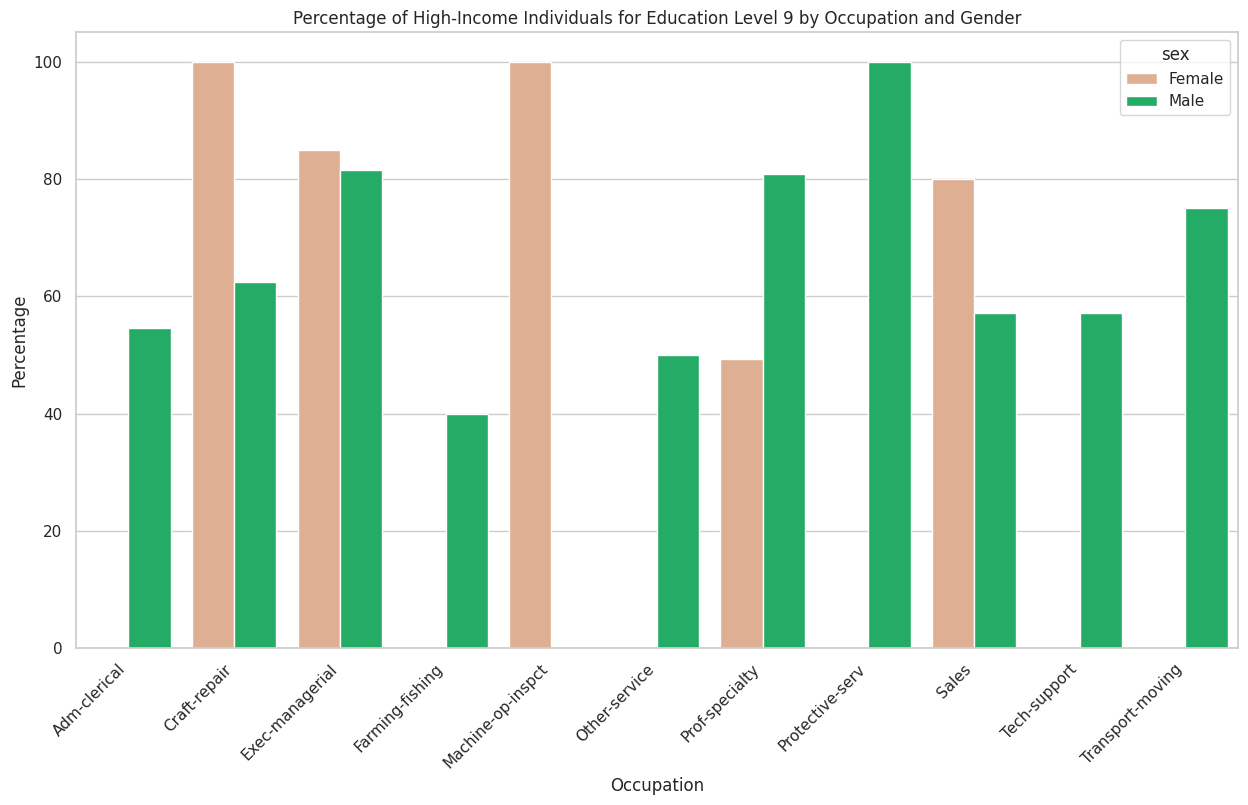

ValueError: min() arg is an empty sequence

<Figure size 1500x800 with 0 Axes>

In [ ]:
for education_num_to_analyze in [9,10,13]:

    # Filter the population by education_num
    df_filtered = df[df['education_num'] == education_num_to_analyze]

    # Calculate the percentage of high-income individuals by gender and occupation
    percentage_high_income_filtered = df_filtered[df_filtered['income'] == '>50K'].groupby(['occupation', 'sex']).size() / df_filtered.groupby(['occupation', 'sex']).size() * 100

    # Reset the index to make it easier to work with
    percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')

    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x='occupation', y='percentage', hue='sex', data=percentage_high_income_filtered, palette={'Male': male_color, 'Female': female_color})
    plt.title(f'Percentage of High-Income Individuals for Education Level {education_num_to_analyze} by Occupation and Gender')
    plt.xlabel('Occupation')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    # Show the plot
    plt.show()

## Occupation

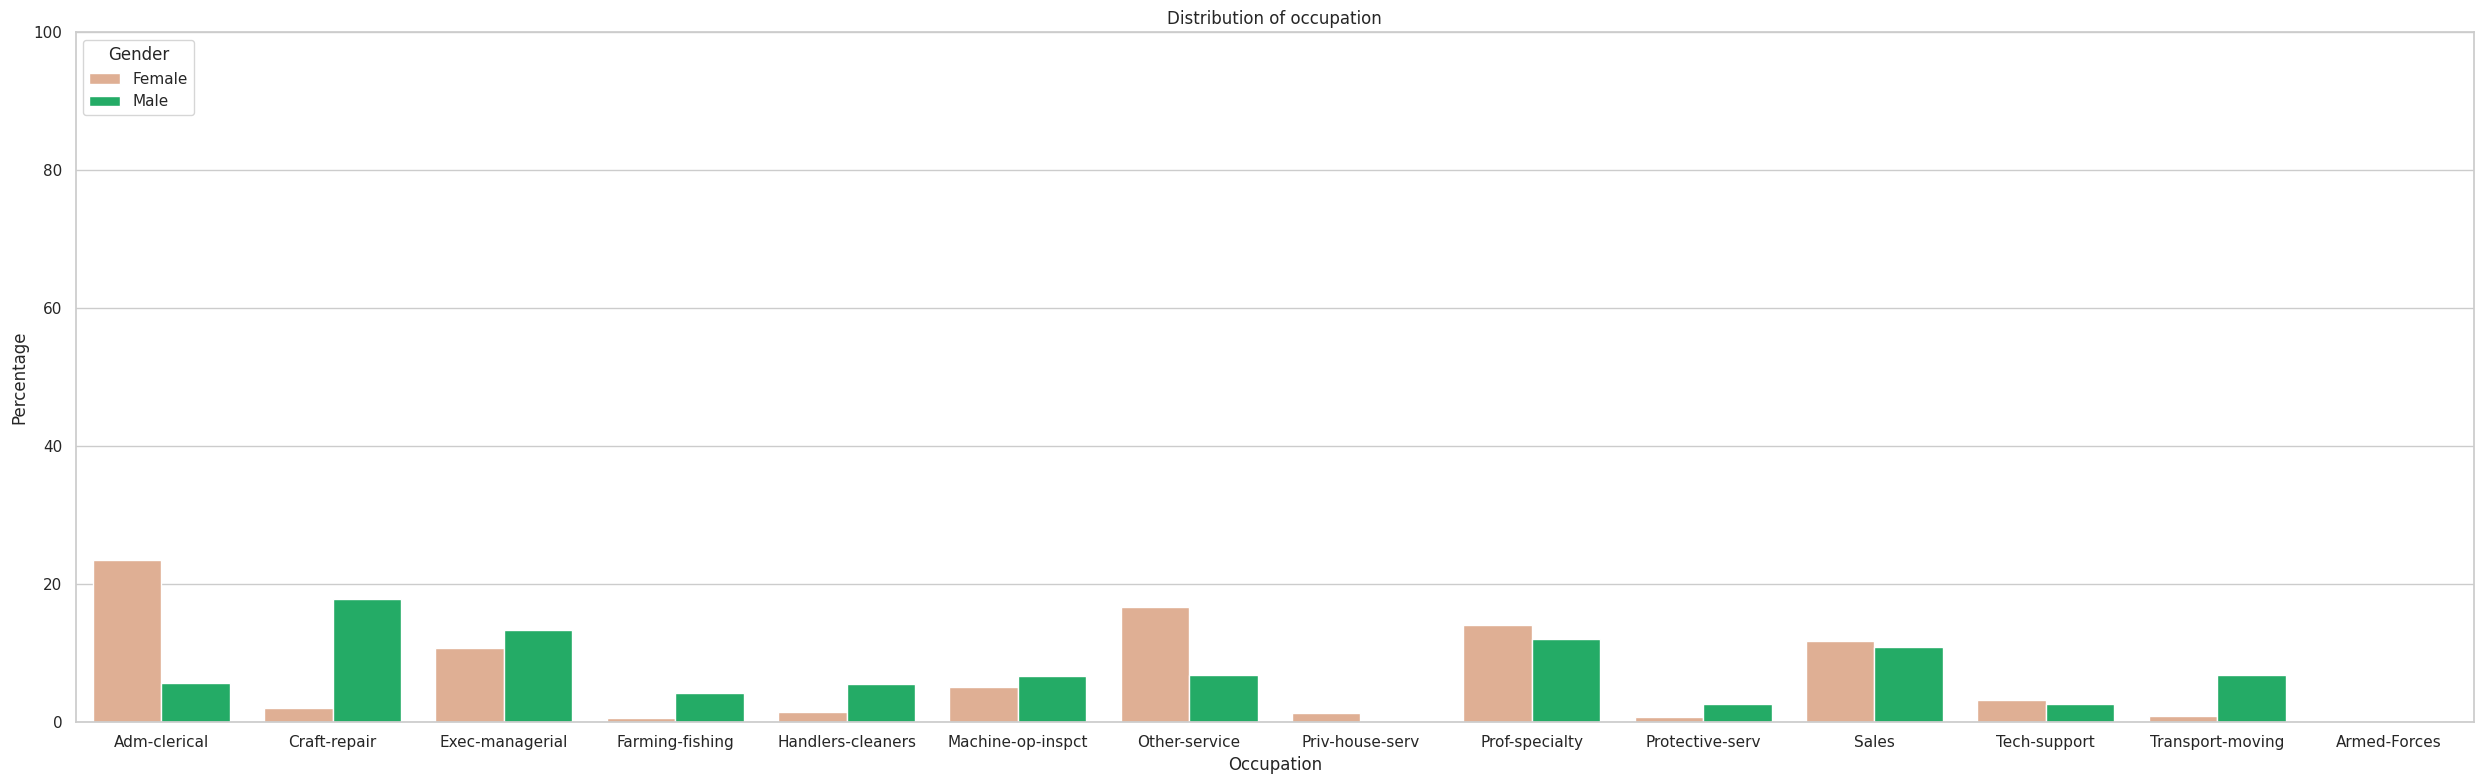

In [ ]:
# Calculate the total number of females and males in the dataset
total_females = df[df['sex'] == 'Female'].shape[0]
total_males = df[df['sex'] == 'Male'].shape[0]

# Calculate the percentage of females and males in each occupation
percentage_females_by_occupation = (df[df['sex'] == 'Female'].groupby('occupation').size() / total_females) * 100
percentage_males_by_occupation = (df[df['sex'] == 'Male'].groupby('occupation').size() / total_males) * 100

# Create DataFrames for plotting
percentage_df_females = pd.DataFrame({
    'Occupation': percentage_females_by_occupation.index,
    'Percentage': percentage_females_by_occupation.values,
    'Gender': 'Female'
})

percentage_df_males = pd.DataFrame({
    'Occupation': percentage_males_by_occupation.index,
    'Percentage': percentage_males_by_occupation.values,
    'Gender': 'Male'
})

# Combine the DataFrames
combined_df = pd.concat([percentage_df_females, percentage_df_males], ignore_index=True)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(25, 8))
bar_plot = sns.barplot(x='Occupation', y='Percentage', hue='Gender', data=combined_df, palette={'Female': female_color, 'Male': male_color})

# Customize the plot
plt.title('Distribution of occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Ensure the y-axis ranges from 0 to 100
plt.legend(title='Gender', loc='upper left')

# Save the plot as a PNG image with a transparent background
plt.savefig('distribution_ocupation.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

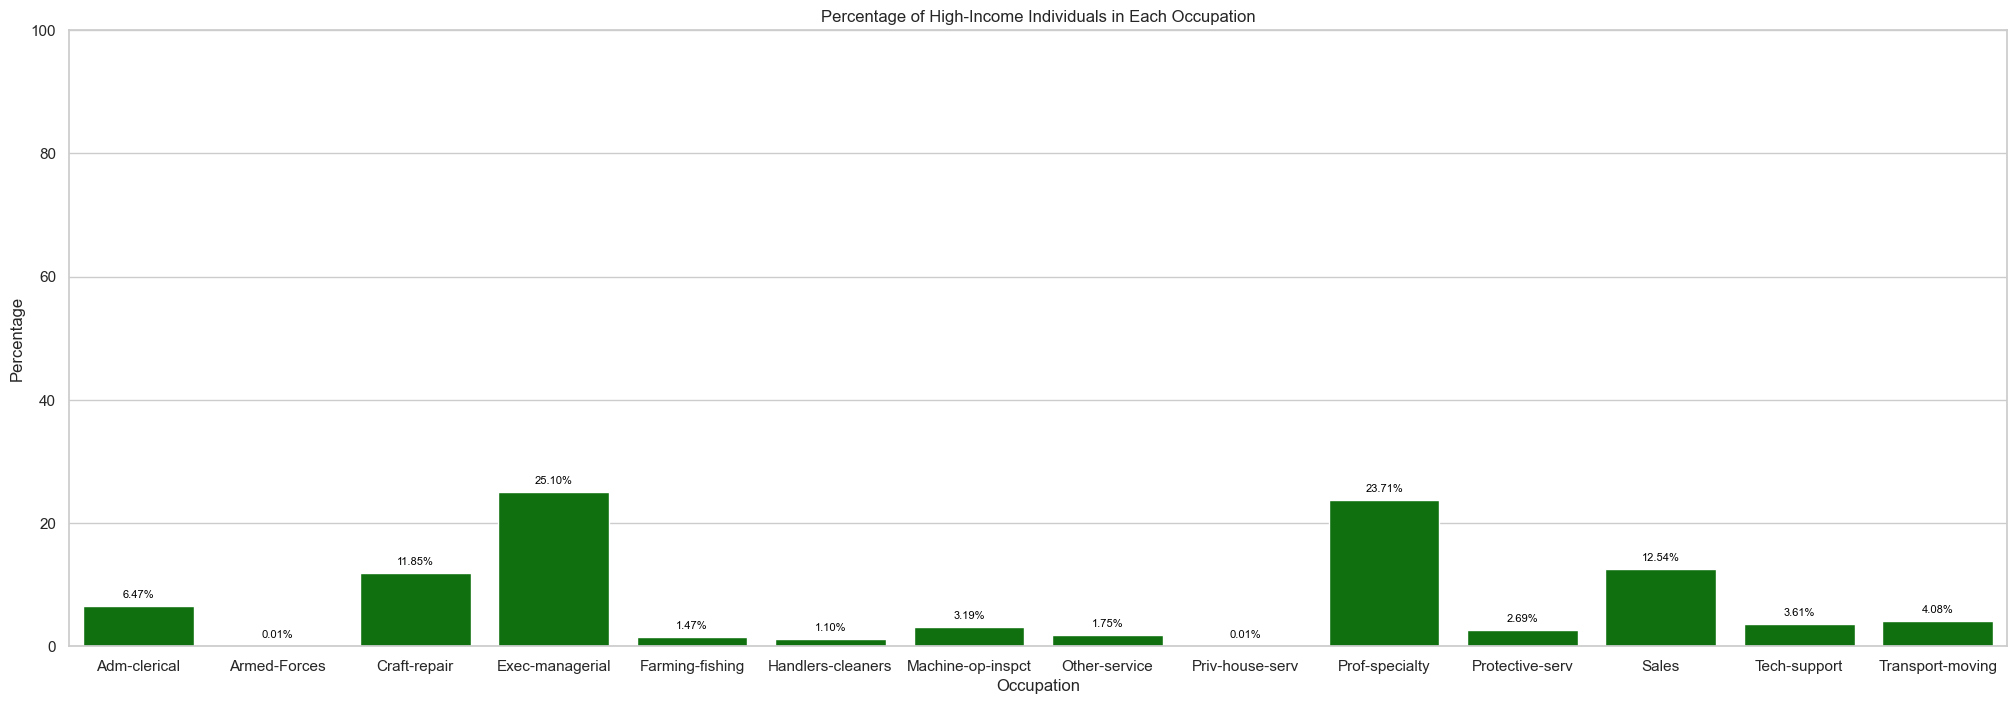

In [ ]:
# Calculate the total number of high-income individuals
total_high_income = df[df['income'] == '>50K'].shape[0]

# Calculate the percentage of high-income individuals in each occupation
percentage_high_income_by_occupation = (df[df['income'] == '>50K'].groupby('occupation').size() / total_high_income) * 100

# Create DataFrame for plotting
percentage_df_high_income = pd.DataFrame({
    'Occupation': percentage_high_income_by_occupation.index,
    'Percentage High Income': percentage_high_income_by_occupation.values
})

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(25, 8))
bar_plot = sns.barplot(x='Occupation', y='Percentage High Income', data=percentage_df_high_income, color='green')

# Add percentage labels for each bar
for index, row in percentage_df_high_income.iterrows():
    plt.text(index, row['Percentage High Income'] + 1, f'{row["Percentage High Income"]:.2f}%', ha='center', va='bottom', color='black', fontsize=8)

# Customize the plot
plt.title('Percentage of High-Income Individuals in Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Ensure the y-axis ranges from 0 to 100

# Save the plot as a PNG image with a transparent background
plt.savefig('percentage_high_income_by_occupation.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

## Hours per week distribution by Gender

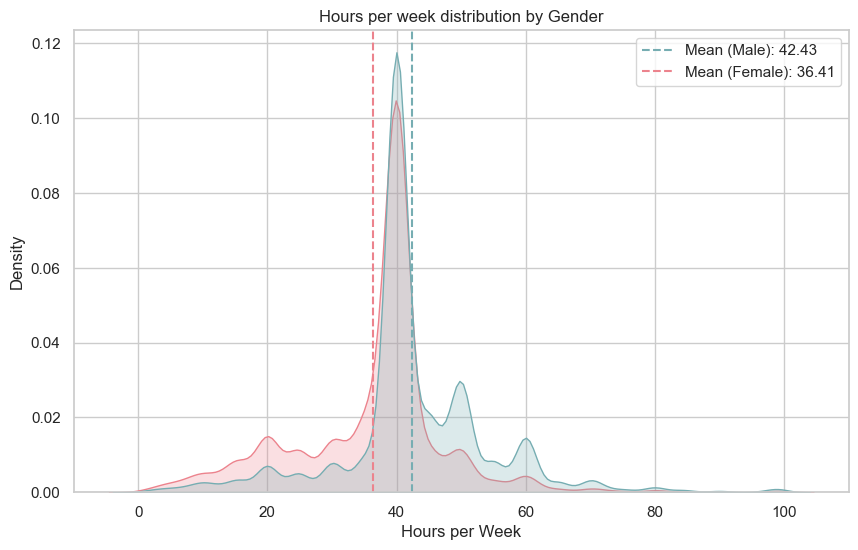

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#ec838d'
male_color = '#76adb2'

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='hours_per_week', hue='sex', data=df, fill=True, common_norm=False, palette={'Male': male_color, 'Female': female_color})

# Calculate and plot the mean
mean_hours_per_week = df.groupby('sex')['hours_per_week'].mean()
plt.axvline(x=mean_hours_per_week['Male'], color=male_color, linestyle='--', label=f'Mean (Male): {mean_hours_per_week["Male"]:.2f}')
plt.axvline(x=mean_hours_per_week['Female'], color=female_color, linestyle='--', label=f'Mean (Female): {mean_hours_per_week["Female"]:.2f}')

# Customize the plot
plt.title('Hours per week distribution by Gender')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()

# Save the plot as a PNG image with a transparent background
plt.savefig('hours_distribution_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

These are depending on gender and marital status:

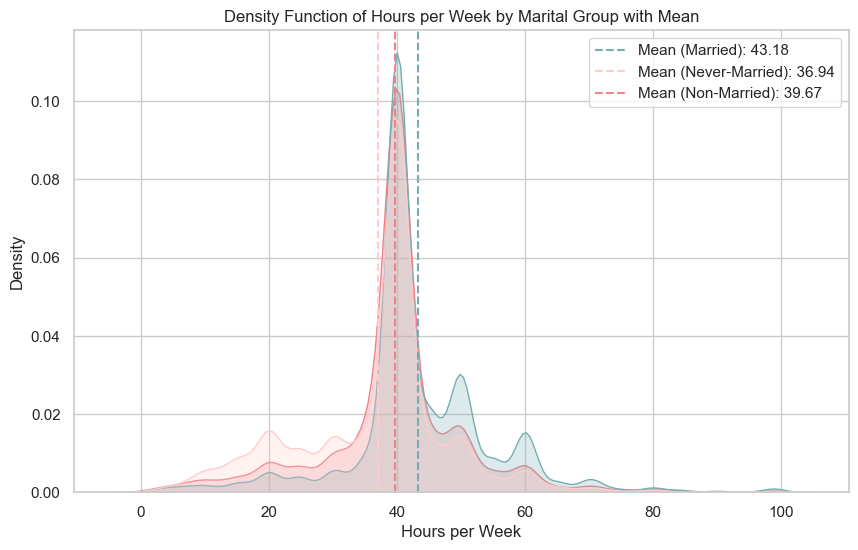

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#ec838d'
male_color = '#76adb2'

# Map the marital status to a broader category
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='hours_per_week', hue='marital_group', data=df, fill=True, common_norm=False,
            palette={'Married': male_color, 'Never-Married': '#ffcccb', 'Non-Married': female_color})

# Calculate and plot the mean for each group
mean_hours_per_week = df.groupby('marital_group')['hours_per_week'].mean()
for group, color in zip(mean_hours_per_week.index, [male_color, '#ffcccb', female_color]):
    plt.axvline(x=mean_hours_per_week[group], color=color, linestyle='--', label=f'Mean ({group}): {mean_hours_per_week[group]:.2f}')

# Customize the plot
plt.title('Density Function of Hours per Week by Marital Group with Mean')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()



# Show the plot
plt.show()

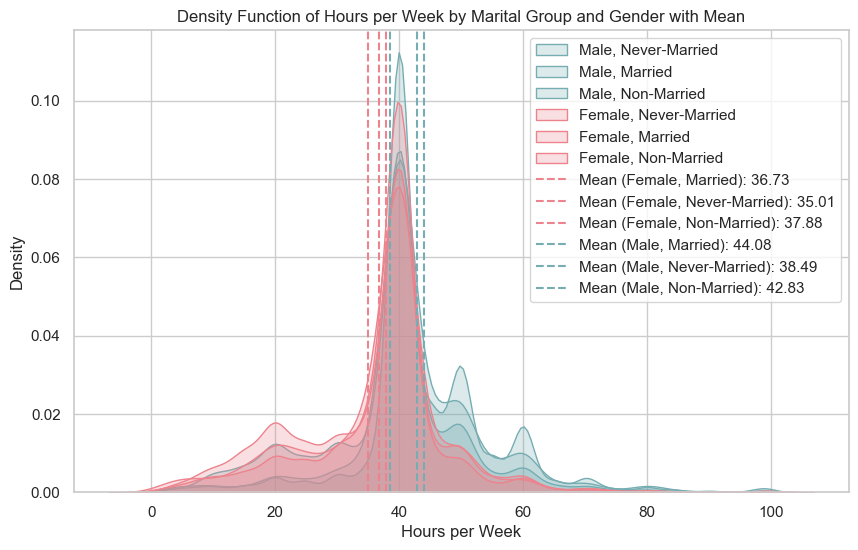

In [ ]:

# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#ec838d'
male_color = '#76adb2'

# Map the marital status to a broader category
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Create separate KDE plots for each combination of gender and marital status
plt.figure(figsize=(10, 6))
for gender in df['sex'].unique():
    for marital_group in df['marital_group'].unique():
        subset = df[(df['sex'] == gender) & (df['marital_group'] == marital_group)]
        sns.kdeplot(x='hours_per_week', data=subset, fill=True, common_norm=False,
                    label=f'{gender}, {marital_group}', color=male_color if gender == 'Male' else female_color)

# Calculate and plot the mean for each group
mean_hours_per_week = df.groupby(['sex', 'marital_group'])['hours_per_week'].mean().reset_index()
for row in mean_hours_per_week.itertuples():
    color = male_color if row.sex == 'Male' else female_color
    plt.axvline(x=row.hours_per_week, color=color, linestyle='--', label=f'Mean ({row.sex}, {row.marital_group}): {row.hours_per_week:.2f}')

# Customize the plot
plt.title('Density Function of Hours per Week by Marital Group and Gender with Mean')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()



# Show the plot
plt.show()

## Female dependency

      sex  marital_group  percentage
0  Female        Married   41.098081
1  Female  Never-Married    3.482274
2  Female    Non-Married    5.862403
3    Male        Married   44.051399
4    Male  Never-Married    5.493577
5    Male    Non-Married   15.945135


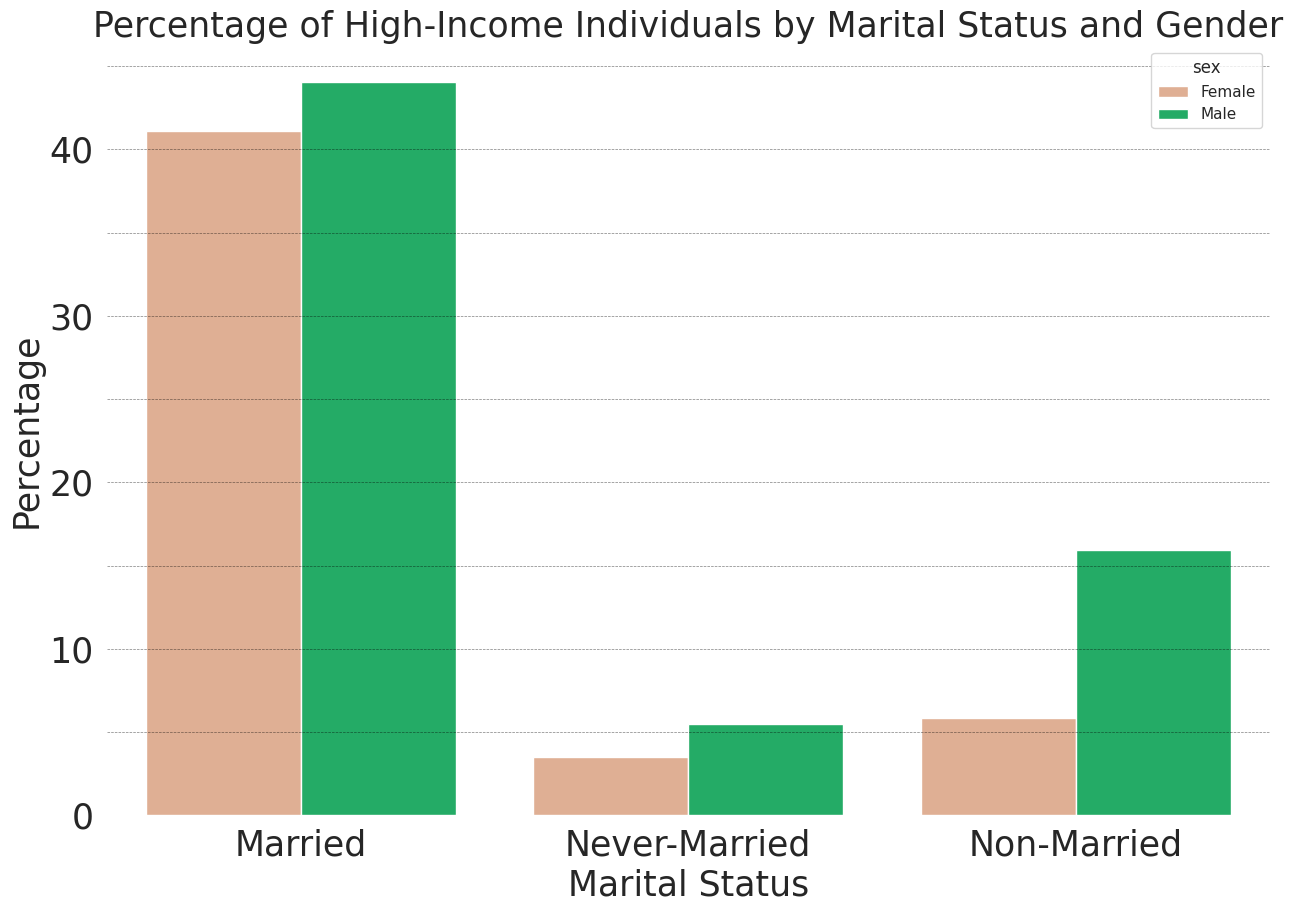

In [ ]:
# Map the marital status to three classes: 'Married', 'Never-Married', and 'Non-Married'
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Calculate the percentage of high-income individuals by gender and marital status
percentage_high_income = df[df['income'] == '>50K'].groupby(['sex', 'marital_group']).size() / df.groupby(['sex', 'marital_group']).size() * 100

# Reset the index to make it easier to work with
percentage_high_income = percentage_high_income.reset_index(name='percentage')
print(percentage_high_income)
# Set the style for the plots
sns.set(style="white")

# Create a stacked bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='marital_group', y='percentage', hue='sex', data=percentage_high_income, palette={'Male': male_color, 'Female': female_color})
plt.title('Percentage of High-Income Individuals by Marital Status and Gender', fontsize=25)
plt.xlabel('Marital Status', fontsize=25)
plt.ylabel('Percentage', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.box(False)

for edu_num in range(5,50,5):
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

# Save the plot as a PNG image with a transparent background
plt.savefig('high_income_by_maritalgroup_and_gender.png', transparent=True, bbox_inches='tight')

plt.show()

Note:The difference in Never-Married diminishes with age, while Non-Married widens. Minimal difference in working hours (seen before)

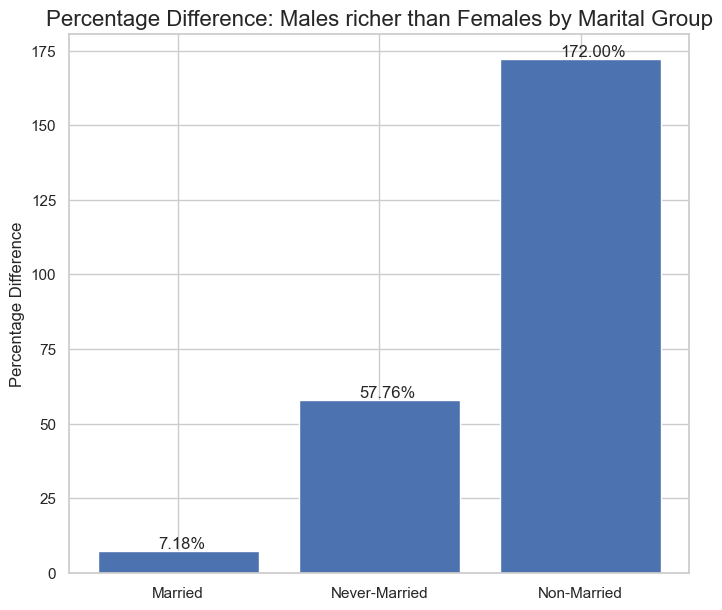

In [ ]:

# Data
categories = ['Married', 'Never-Married', 'Non-Married']
percentages = [7.18, 57.76, 172]

# Create a bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(categories, percentages, alpha=1)  # Use the same color for Married and Non-Married

# Add annotations to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f"{percentage:.2f}%", fontsize=12)

# Customize the plot
plt.title('Percentage Difference: Males richer than Females by Marital Group', fontsize=16)
plt.ylabel('Percentage Difference', fontsize=12)

# Save the plot as a PNG image with a transparent background
plt.savefig('marital_dependency.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


When working the same hours female still get paid less. Here is shown only 40 hours, but it has been checked by all number of hours and the result is almost always: male tend to have higher-income

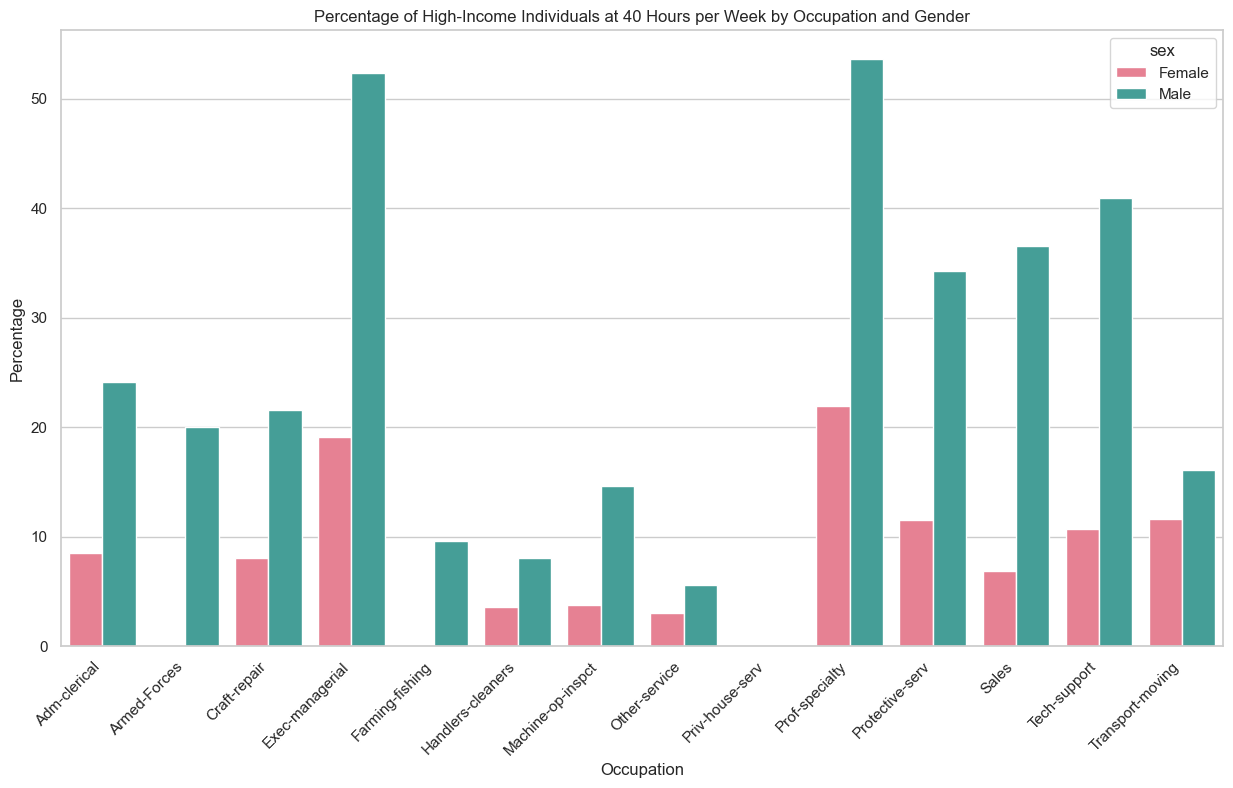

In [ ]:
# Filter the population by hours_per_week == 40
df_filtered = df[df['hours_per_week'] == 40]

# Calculate the percentage of high-income individuals by gender and occupation
percentage_high_income_filtered = df_filtered[df_filtered['income'] == '>50K'].groupby(['occupation', 'sex']).size() / df_filtered.groupby(['occupation', 'sex']).size() * 100

# Reset the index to make it easier to work with
percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='occupation', y='percentage', hue='sex', data=percentage_high_income_filtered, palette='husl')
plt.title('Percentage of High-Income Individuals at 40 Hours per Week by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Save the plot as a PNG image with a transparent background
plt.savefig('percentage_high_income_working40h_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

## Percentage high-income by continent

When working 40 hours:

       continent     sex  percentage
0           Asia  Female   16.949153
1           Asia    Male   35.820896
2         Europe  Female   17.073171
3         Europe    Male   32.142857
4  North America  Female   10.268670
5  North America    Male   27.381870
6  South America  Female    2.316602
7  South America    Male    9.010601


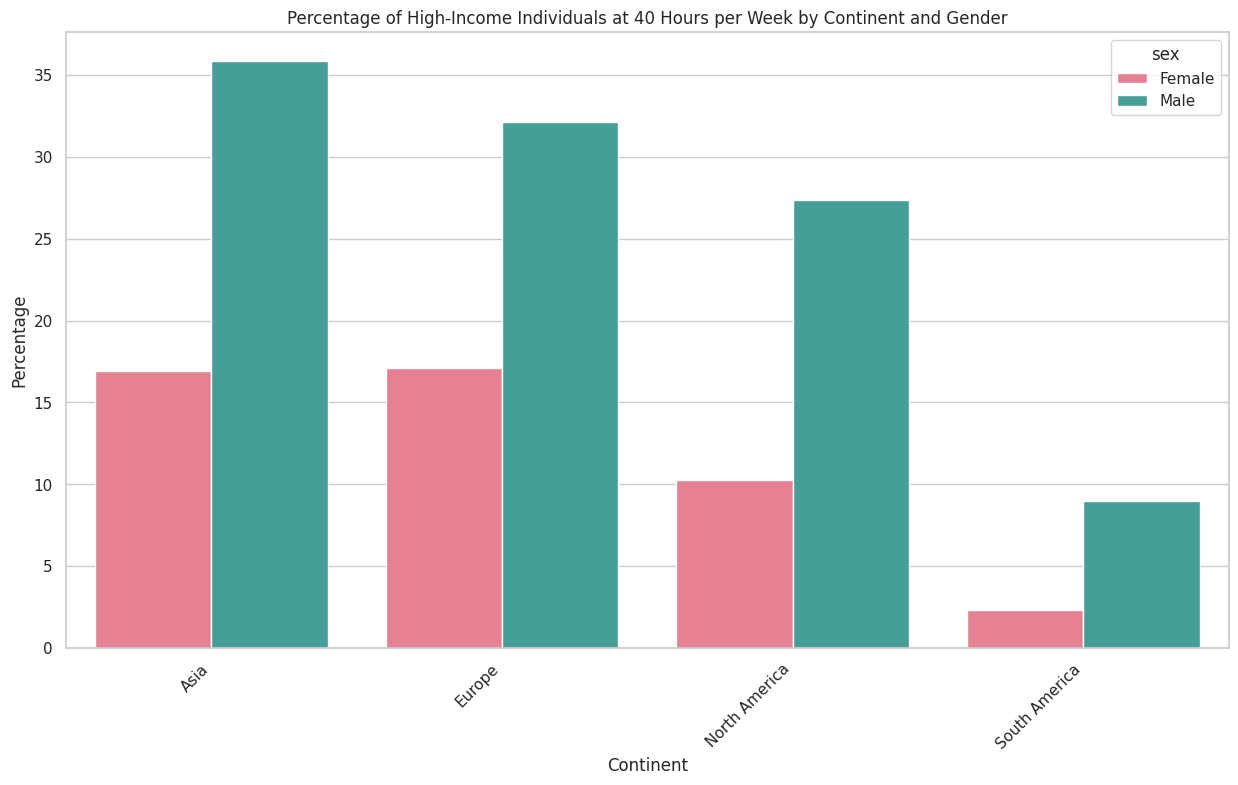

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python",na_values='?')

# Mapping of countries to continents
country_to_continent = {
    'United-States': 'North America',
    'Mexico': 'South America',
    'Canada': 'North America',
    'Puerto-Rico': 'South America',
    'El-Salvador': 'South America',
    'Cuba': 'South America',
    'Jamaica': 'South America',
    'South': 'South America',
    'Dominican-Republic': 'South America',
    'Guatemala': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Honduras': 'South America',
    'Trinadad&Tobago': 'South America',
    'Columbia': 'South America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Nicaragua': 'South America',
    'Haiti': 'South America',
    'Portugal': 'Europe',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Hong': 'Asia',
    'Vietnam': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Iran': 'Asia',
    'India': 'Asia',
    'Philippines': 'Asia',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Scotland': 'Europe',
    'Germany': 'Europe',
    'England': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe'
}

for e in range(40,41):
    # Map native_country to continent
    df['continent'] = df['native_country'].map(country_to_continent)

    # Filter the population by hours_per_week == 40
    df_filtered = df[df['hours_per_week'] == e]

    # Calculate the percentage of high-income individuals by gender and continent
    percentage_high_income_filtered = df_filtered[df_filtered['income'] == '>50K'].groupby(['continent', 'sex']).size() / df_filtered.groupby(['continent', 'sex']).size() * 100

    # Reset the index to make it easier to work with
    percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')
    print(percentage_high_income_filtered)
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x='continent', y='percentage', hue='sex', data=percentage_high_income_filtered, palette='husl')
    plt.title('Percentage of High-Income Individuals at 40 Hours per Week by Continent and Gender')
    plt.xlabel('Continent')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    # Show the plot
    plt.show()

In general:

continent      sex   
Asia           Female      34
               Male       172
Europe         Female      30
               Male       122
North America  Female    1081
               Male      6129
South America  Female      17
               Male       110
dtype: int64
continent      sex   
Asia           Female      199
               Male        472
Europe         Female      183
               Male        338
North America  Female     9728
               Male      19577
South America  Female      498
               Male        983
dtype: int64
       continent     sex  percentage
0           Asia  Female   17.085427
1           Asia    Male   36.440678
2         Europe  Female   16.393443
3         Europe    Male   36.094675
4  North America  Female   11.112253
5  North America    Male   31.307146
6  South America  Female    3.413655
7  South America    Male   11.190234


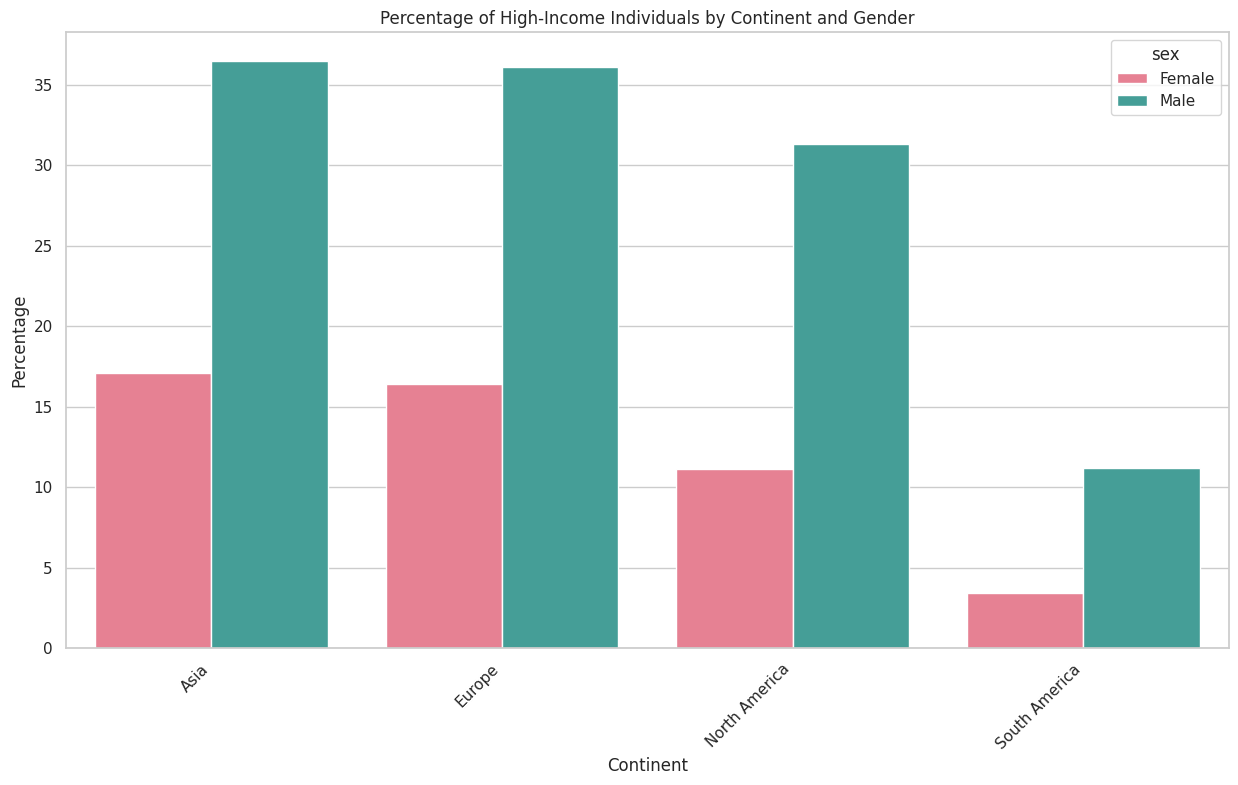

In [ ]:
# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

print(df[df['income'] == '>50K'].groupby(['continent', 'sex']).size())
print(df.groupby(['continent', 'sex']).size())
# Calculate the percentage of high-income individuals by gender and continent
percentage_high_income = df[df['income'] == '>50K'].groupby(['continent', 'sex']).size() / df.groupby(['continent', 'sex']).size() * 100

# Reset the index to make it easier to work with
percentage_high_income = percentage_high_income.reset_index(name='percentage')
print(percentage_high_income)
# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='continent', y='percentage', hue='sex', data=percentage_high_income, palette='husl')
plt.title('Percentage of High-Income Individuals by Continent and Gender')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

South Americans receive lower pay, and the gender pay gap is more pronounced in this region. Males are 227.81% wealthier than females in South America, 181.73% in North America, 120.18% in Europe and 113.28% in Asia


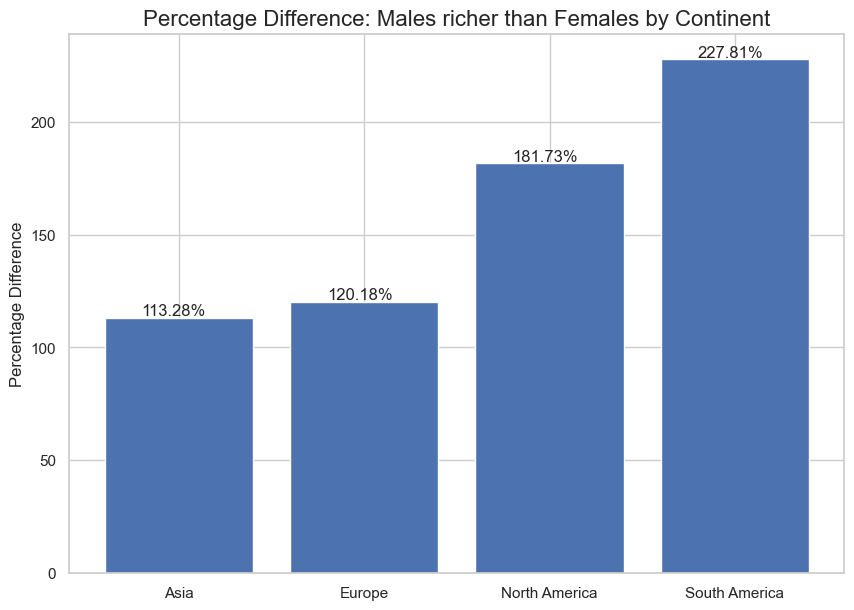

In [ ]:
# Data
continents = ['Asia', 'Europe', 'North America', 'South America']
percentages = [113.28, 120.18, 181.73, 227.81]

# Create a bar plot
plt.figure(figsize=(10, 7))
bars = plt.bar(continents, percentages, alpha=1)  # Use different colors for each continent

# Add annotations to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 1, f"{percentage:.2f}%", fontsize=12)

# Customize the plot
plt.title('Percentage Difference: Males richer than Females by Continent', fontsize=16)
plt.ylabel('Percentage Difference', fontsize=12)

# Save the plot as a PNG image with a transparent background
plt.savefig('continent_dependency.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

Perecentage of high-income by continent

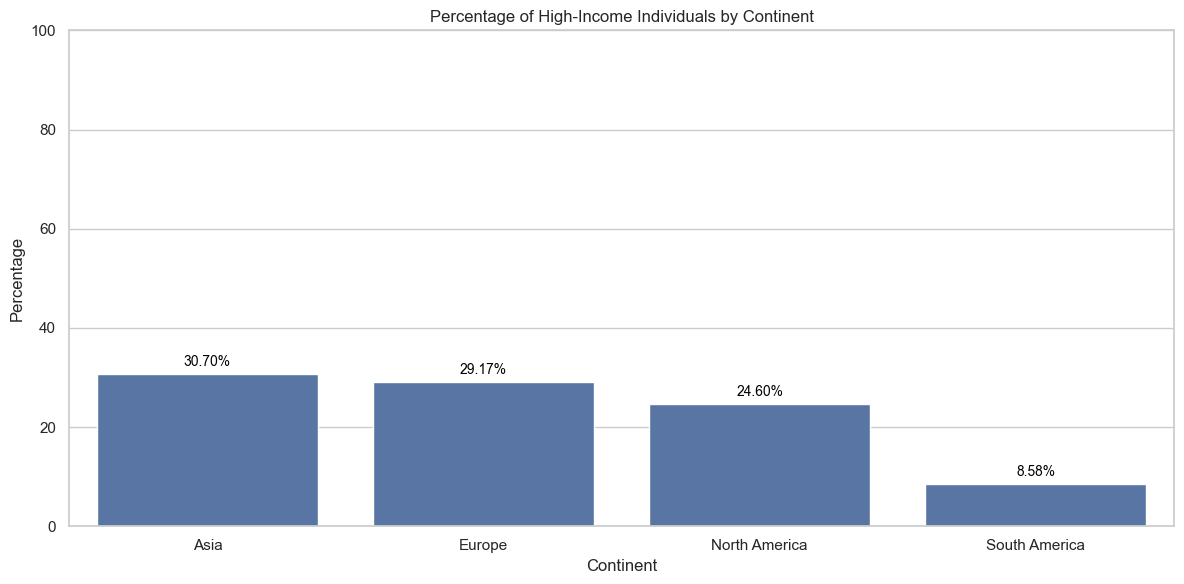

In [ ]:

# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

# Calculate the percentage of high-income individuals by continent
percentage_high_income_by_continent = df[df['income'] == '>50K'].groupby('continent').size() / df.groupby('continent').size() * 100

# Reset the index to make it easier to work with
percentage_high_income_by_continent = percentage_high_income_by_continent.reset_index(name='percentage')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='continent', y='percentage', data=percentage_high_income_by_continent)

# Add percentage labels for each bar
for index, row in percentage_high_income_by_continent.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# Customize the plot
plt.title('Percentage of High-Income Individuals by Continent')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Ensure the y-axis ranges from 0 to 100

plt.savefig('percentage_high_income_by_continent.png', transparent=True, bbox_inches='tight')


# Show the plot
plt.tight_layout()
plt.show()

People from different continents work more or less the same hours:

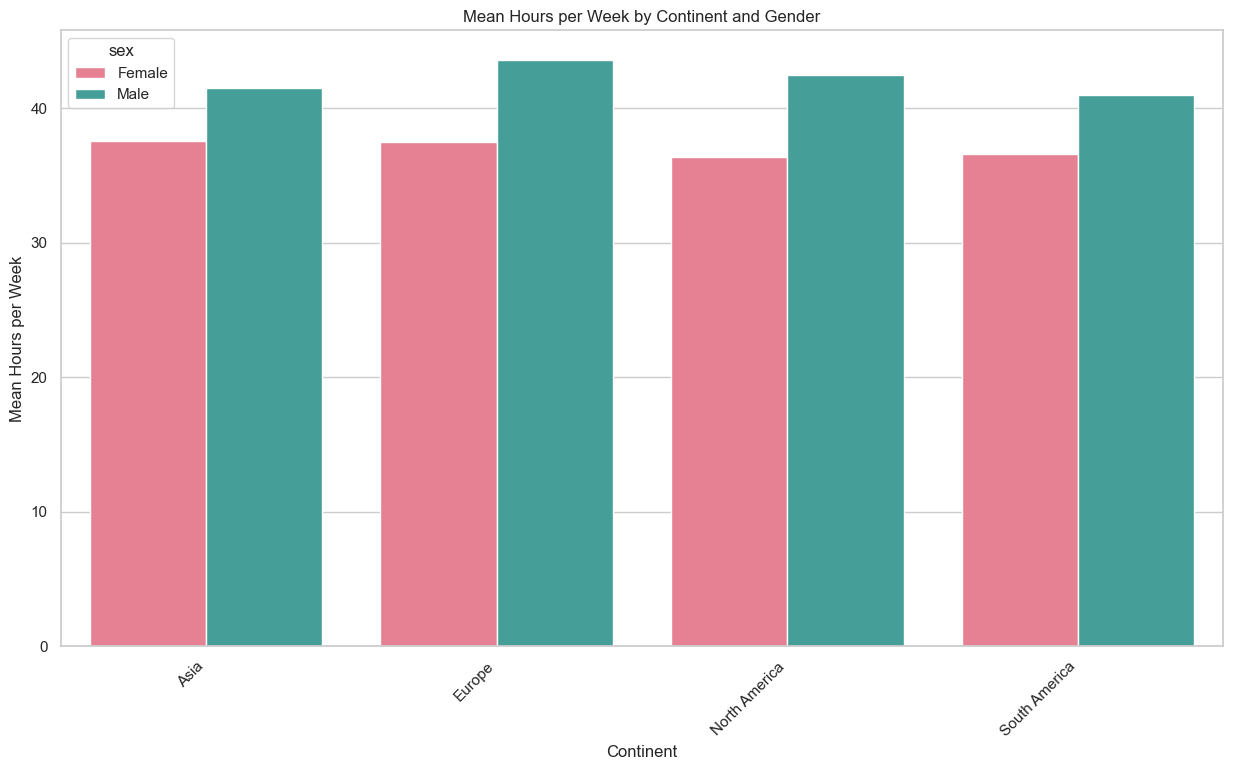

In [ ]:
# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

# Calculate the mean of hours_per_week by continent and sex
mean_hours_per_week = df.groupby(['continent', 'sex'])['hours_per_week'].mean().reset_index()

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='continent', y='hours_per_week', hue='sex', data=mean_hours_per_week, palette='husl')
plt.title('Mean Hours per Week by Continent and Gender')
plt.xlabel('Continent')
plt.ylabel('Mean Hours per Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

## Part1: Exploratory data analysis

### (a) Describe the data
Initially, a comprehensive overview of the data is presented:

In [ ]:
# Display basic information about the dataset
print("Data Description:")
print(df.describe())

# Explore data types, range of values, and missing values
print("\nData Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

print(df.shape)

Data Description:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Data Information:
<class 'pandas.core.frame.

Subsequently, we shall proceed with the removal of rows containing missing values. The decision to undertake this action is based on the relatively limited prevalence of such missing values within the dataset, which comprises more than 32,000 samples. This change will not affect our primary objective, which is to show the fundamental characteristics of each attribute and analyze the correlations existing among them.

In [ ]:
#when we read the data we replaced the '?' values with nan values and now we will
# Remove rows with missing values in any column
df = df.dropna()
print("\nMissing Values:")
print(df.isnull().sum())
print(df.shape)


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
(30162, 15)


To visually represent the distribution of each attribute across our dataset, histograms and density plots are generated for each numerical feature, namely: "age", "fnlwgt", "education_num", "capital_gain", "capital_loss" and "hours_per_week".

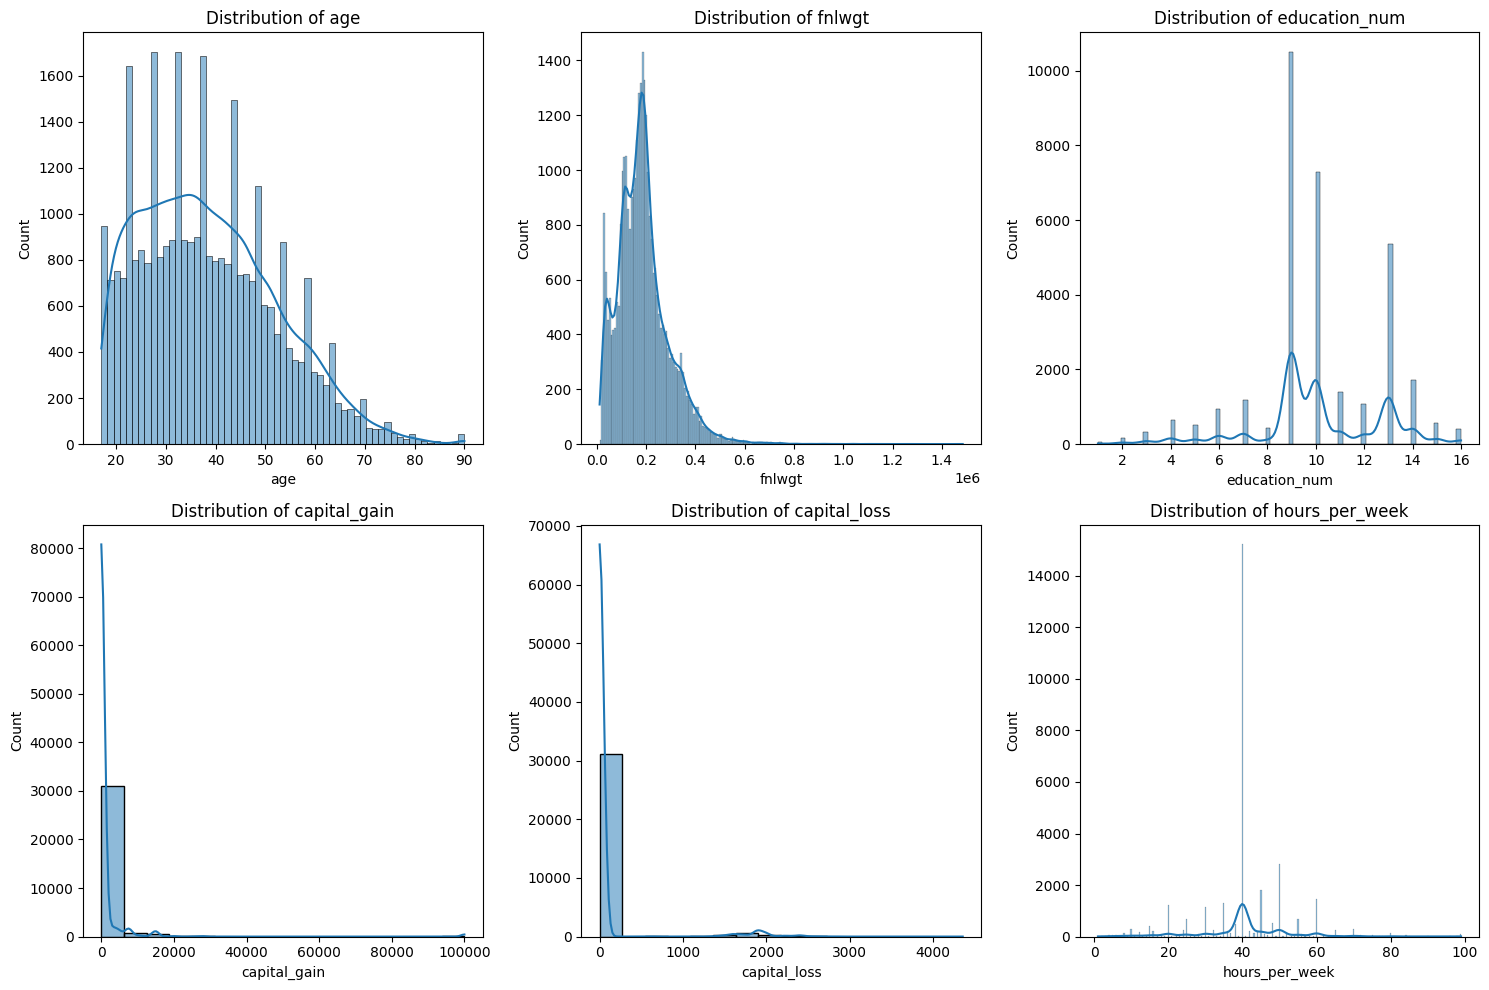

In [ ]:
# Data Distribution
# Create histograms and density plots for numerical features
numerical_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


We place a particular emphasis on analyzing the distribution of "age" and "hours_per_week".

1. Age Distribution:
      - Histogram: The age distribution appears to be slightly right-skewed, with a peak in the mid-30s. This suggests that a significant portion of the dataset consists of individuals in their 30s.
      - Density Plot: The density plot confirms the right-skewed nature of the age distribution. It provides a smoother representation of the data distribution.

2. Hours per Week Distribution:

      - Histogram: The distribution of hours worked per week appears to be roughly normally distributed, with a peak around 40 hours per week, which is typical for full-time employment.
      - Density Plot: The density plot supports the approximately normal distribution, with a clear peak at 40 hours per week.

To assess the presence of outliers, boxplots have been generated for the relevant numerical features.

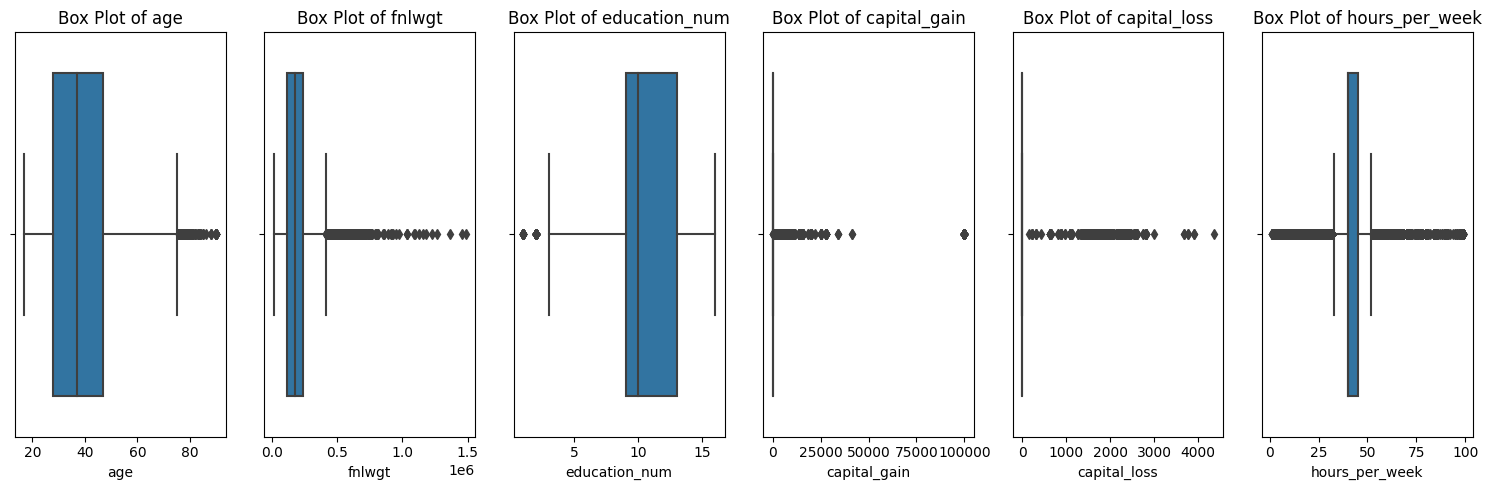

In [ ]:
# Outliers
# Create box plots to identify potential outliers in numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(x=feature, data=df)
    plt.title(f"Box Plot of {feature}")
plt.tight_layout()
plt.show()


1. Age Outliers: The age box plot shows a few outliers on the high end, indicating individuals who are significantly older than the majority of the dataset. These outliers suggest a presence of older individuals.

2. Hours per Week Outliers: The hours per week box plot doesn't reveal clear outliers, suggesting that the distribution of hours worked per week is relatively uniform without extreme values.


Upon observing the distribution of "capital_gain" and "capital_loss," it seems advisable to omit these variables from the Dashboard.  However, during this exploratory analysis, we will still consider them to assess if they provide distinctive value.

Continuing our examination, we turn our attention to the categorical features. Specifically, we are keen on further exploring the "native_country" column to determine its fundamental structure. This involves investigating the distinct native countries present in the dataset, determining the percentage of each country relative to the entire sample, and specifying the percentage of immigrants within the overall dataset.

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
Country Counts and Percentages:
                            Count  Percentage
United-States               27504   91.187587
Mexico                        610    2.022412
Philippines                   188    0.623301
Germany                       128    0.424375
Puerto-Rico                   109    0.361382
Canada                        107    0.354751
India                         100    0.331543
El-Salvador                   100    0.331543
Cuba                           92    0.305020
England                        86    0.2851

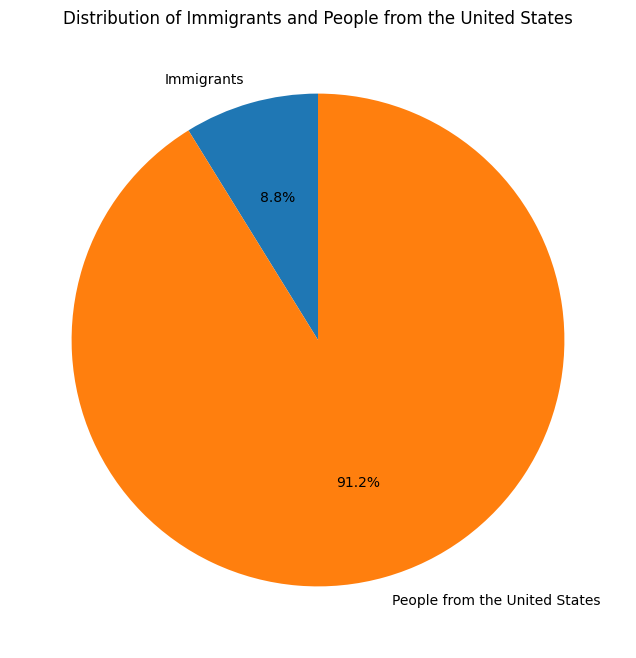

In [ ]:
#Unique values in the "native_country" column:
unique_countries = df['native_country'].unique()
print(unique_countries)


total_entries = len(df)

# Calculate the count and percentage for each country
country_counts = df['native_country'].value_counts()
country_percentages = (country_counts / total_entries) * 100

# Calculate the count and percentage for immigrants (excluding United States)
immigrant_count = total_entries - country_counts['United-States']
immigrant_percentage = (immigrant_count / total_entries) * 100

# Calculate the count and percentage for people from the United States
us_count = country_counts.get('United-States', 0)  # Handle the case where 'United-States' might not be present
us_percentage = (us_count / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': country_counts,
    'Percentage': country_percentages
})

print("Country Counts and Percentages:")
print(result_df)

print("\nImmigrant Counts and Percentage:")
print(f"Count: {immigrant_count}, Percentage: {immigrant_percentage:.2f}%")

print("\nPeople from the United States Counts and Percentage:")
print(f"Count: {us_count}, Percentage: {us_percentage:.2f}%")



#PLOT

fig, ax = plt.subplots(figsize=(8, 8))

# Labels for the pie chart
labels = ['Immigrants', 'People from the United States']

# Values for the pie chart
values = [immigrant_percentage, us_percentage]

# Plot the pie chart
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

ax.set_title('Distribution of Immigrants and People from the United States')

plt.show()

The data presented in the "native_country" feature appears to be a representative sampling of the overall population of the United States. Consequently, it seems prudent to consider this column in our analysis.

In [ ]:
# Calculate the count and percentage for each marital status
marital_status_counts = df['marital_status'].value_counts()
marital_status_percentages = (marital_status_counts / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': marital_status_counts,
    'Percentage': marital_status_percentages
})

print("Marital Status Counts and Percentages:")
print(result_df)

Marital Status Counts and Percentages:
                       Count  Percentage
Married-civ-spouse     14065   46.631523
Never-married           9726   32.245872
Divorced                4214   13.971222
Separated                939    3.113189
Widowed                  827    2.741861
Married-spouse-absent    370    1.226709
Married-AF-spouse         21    0.069624


Similar to the "native_country" feature, the "marital_status" column offers a representative sampling of the overall population of the United States. Therefore, it is advisable to include this column in our analysis.

In [ ]:
# Calculate the count and percentage for each marital status
gender_counts = df['sex'].value_counts()
gender_percentages = (gender_counts / total_entries) * 100

# Display the results
result_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

print("Gender Counts and Percentages:")
print(result_df)

Gender Counts and Percentages:
        Count  Percentage
Male    20380   67.568464
Female   9782   32.431536


The gender attribute exhibits a slight skew, with a higher proportion of males than females. However, the skew is not overly pronounced, allowing for meaningful insights to be extracted from the data.

### (b) Identify relations and groupings

First, we will examine the correlations among the numerical attributes ("age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week") and the "income" column.

In [ ]:
# Replace encoded values in the 'income' column, making the integers instead of strings
df['income'] = df['income'].replace({'<=50K': 0,'>50K':1})

C:\Users\aleja\AppData\Local\Temp\ipykernel_7912\3476136888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


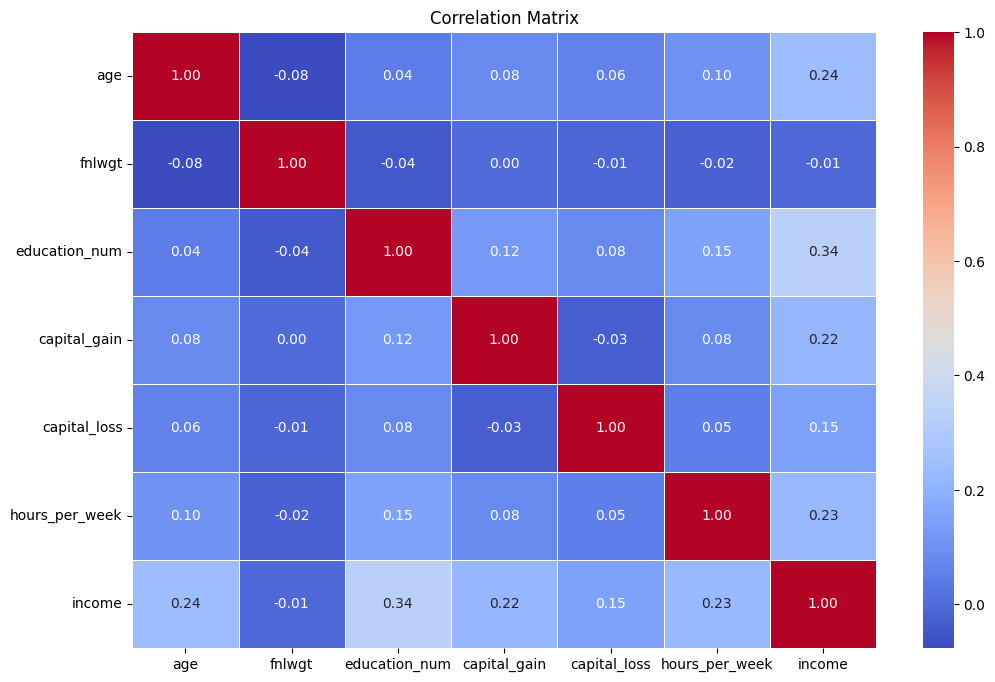

In [ ]:
# Plotting the correlation matrix using a heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

As evident from the preceding heatmap, correlations among the attributes "age", "fnlwgt", "education_num", "capital_gain", "capital_loss" and "hours_per_week" are nearly negligible.

However, when assessing the correlation with the "income" column, the three most positively correlated attributes, in descending order, are "education_num", "age" and "hours_per_week". Additionally, given that the correlation with "fnlwgt" could be considered null, this provides a compelling rationale for excluding it from further consideration.

*Note: Up to this point, we have not considered the "education" column in our analysis. This decision is based on the presence of the "education_num" column, which encapsulates the same information but with an ordered relationship. Consequently, utilizing "education_num" facilitates a more straightforward exploratory analysis. However, "education" will be the one considered in the Dashboard as it is more easily readable for our target audience.*

Let us now examine some of the correlations between the categorical features and the income column.

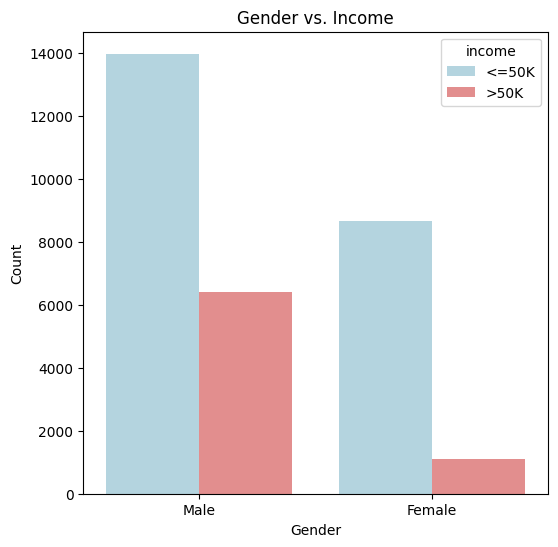

In [ ]:
df['income'] = df['income'].replace({0:'<=50K',1:'>50K'})

# Define a custom color palette with different colors
custom_palette = {"<=50K": "lightblue", ">50K": "lightcoral"}

# Gender and Income
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", hue="income", data=df, palette=custom_palette)
plt.title("Gender vs. Income")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

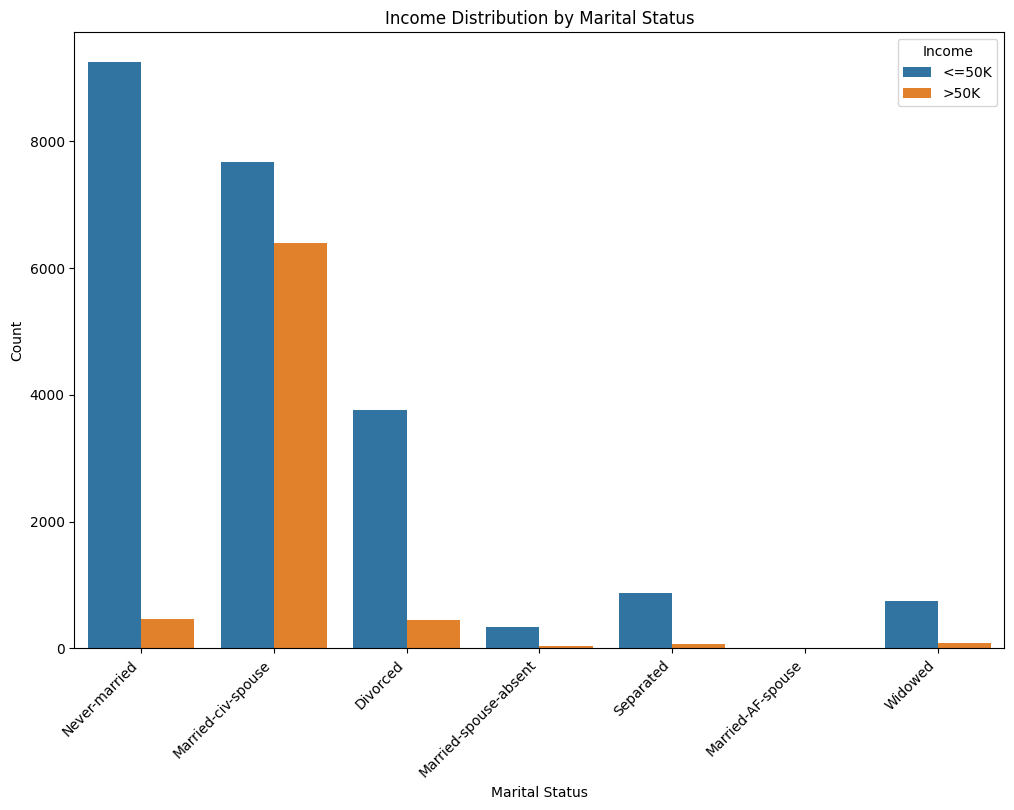

In [ ]:
# Create a bar plot for income distribution by marital status
plt.figure(figsize=(12, 8))
sns.countplot(x='marital_status', hue='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

 The plot, suggests that marital status may be associated with income levels, with "Married-civ-spouse" having a higher likelihood of higher incomes, while "Never-married" individuals are more prevalent in the lower income category.

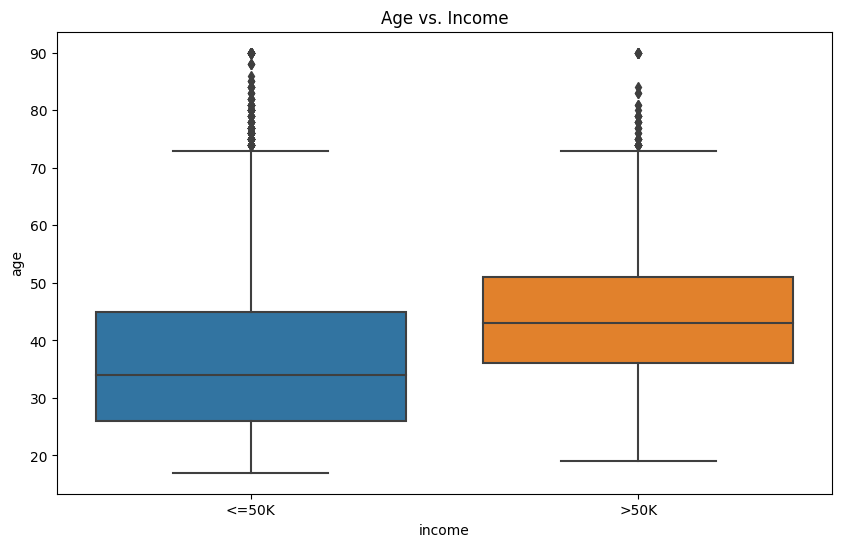

In [ ]:
# Age and Income
plt.figure(figsize=(10, 6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs. Income")
plt.show()

It clearly illustrates that, on average, older individuals tend to have higher incomes, as demonstrated by the higher box position for the ">50K" income category. The plot also highlights the presence of outliers, indicating individuals with incomes significantly different from the median. This visualization succinctly summarizes the income dynamics with respect to age and provides valuable insights into the dataset's income distribution.

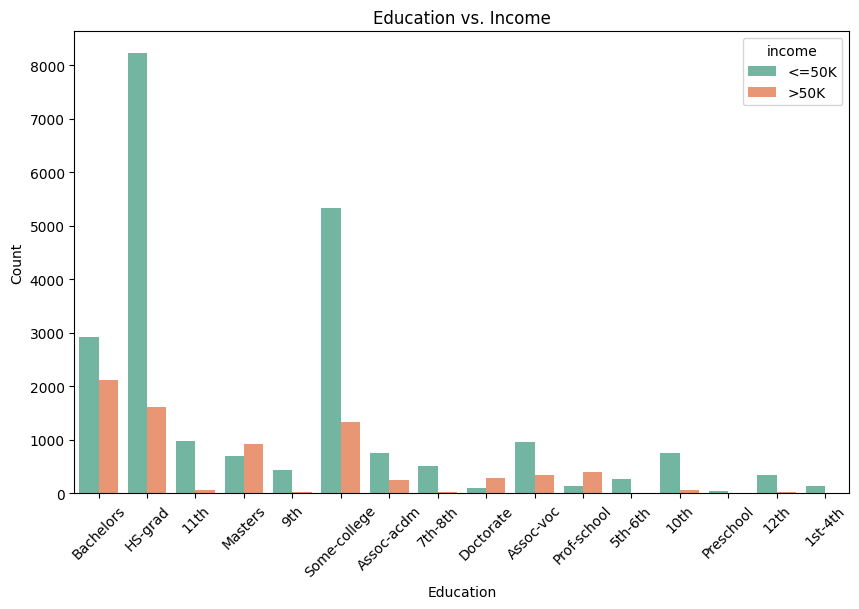

In [ ]:
# Education and Income
plt.figure(figsize=(10, 6))
sns.countplot(x="education", hue="income", data=df, palette="Set2")
plt.title("Education vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

It is evident that individuals with higher education levels, such as a bachelor's degree or higher, have a higher likelihood of earning ">50K," indicating a positive correlation between education and income, as we have proved numerically with the "education_num" column.

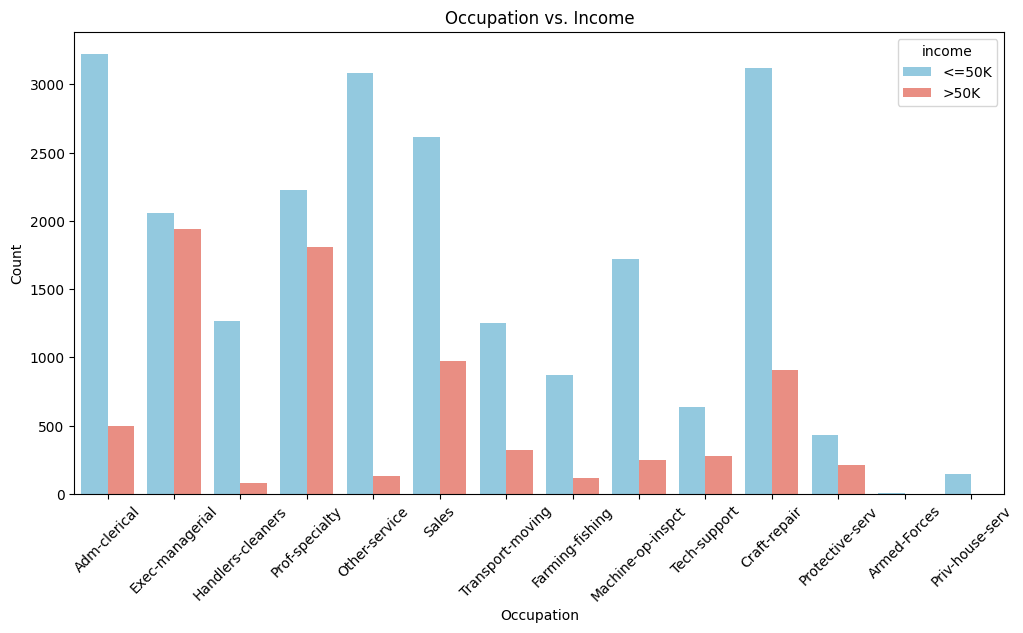

In [ ]:
# Occupation and Income
# Define a custom color palette
custom_palette = {"<=50K": "skyblue", ">50K": "salmon"}

# Occupation and Income
plt.figure(figsize=(12, 6))
sns.countplot(x="occupation", hue="income", data=df, palette=custom_palette)
plt.title("Occupation vs. Income")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

Notably, certain occupations, such as "Exec-managerial" and "Prof-specialty," tend to have a higher proportion of individuals earning ">50K," indicating the potential influence of occupation on income.

It's evident that the ">50K" income category is more prevalent among males, pointing to a gender-based income difference.

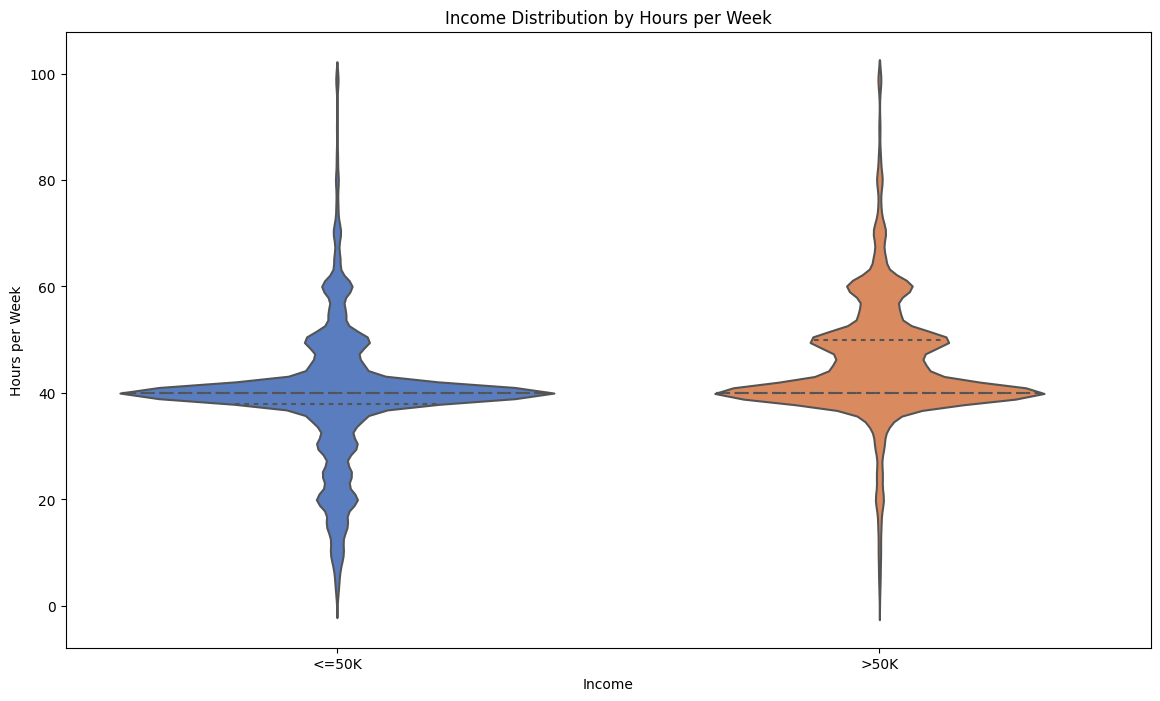

In [ ]:
# Create a violin plot for income distribution by hours per week
plt.figure(figsize=(14, 8))
sns.violinplot(x='income', y='hours_per_week', data=df, inner="quartile", palette="muted")
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

While there is a tendency for individuals with higher incomes to work more hours per week, the overlap and variability in the distributions indicate the importance of considering additional factors in predicting income.

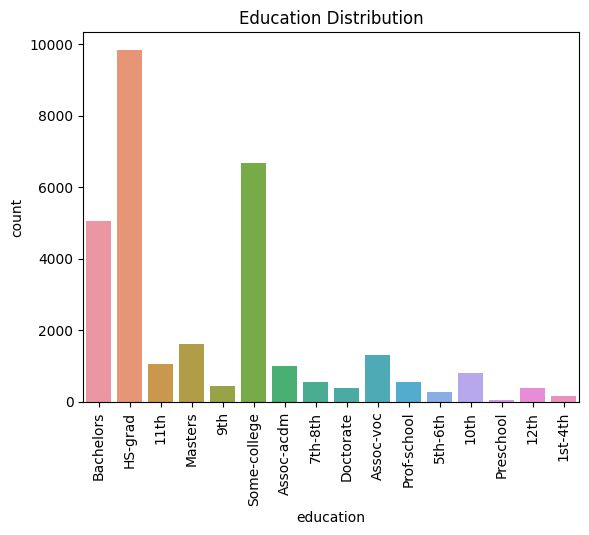

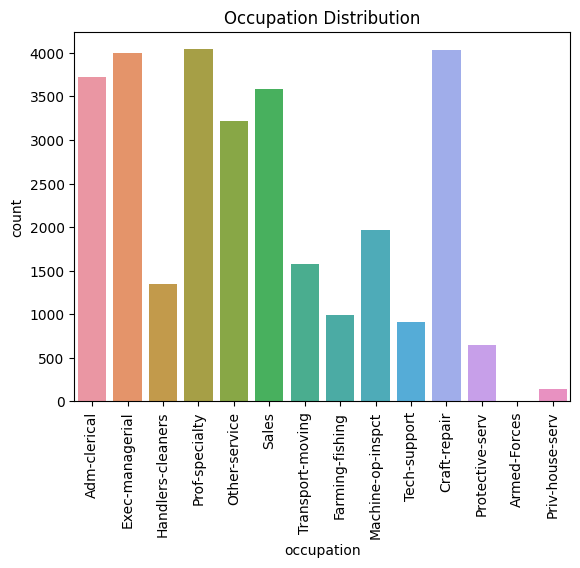

In [ ]:
#Understanting the distribution of individuals across different education levels and occupations in your dataset.
sns.countplot(x="education", data=df)
plt.title("Education Distribution")
plt.xticks(rotation=90)
plt.show()

sns.countplot(x="occupation", data=df)
plt.title("Occupation Distribution")
plt.xticks(rotation=90)
plt.show()


In conclusion, based on the observations thus far, we have chosen the following features "age", "sex", "education", "occupation", "marital_status", "native_country" as the demographic attributes to explain the column "income". These selected features are deemed relevant for providing insights into the income distribution within the dataset.